# Assignment Day 19 - Case Study EDA <br>
## **Hijir Della Wirasti** <br>
Business Intelligence <br>
**Dibimbing** <br>
Batch 13 <br>


**Introduction** <br>
Analisis ini bertujuan untuk memahami pengaruh jumlah kampanye (campaign) terhadap pembukaan akun deposit (y) menggunakan dataset bank marketing. Dataset ini terdiri dari data nasabah, hasil kampanye pemasaran, dan karakteristik finansial.

**Tujuan**<br>
1. Melakukan Data Profiling
2. Melakukan EDA untuk memahami pola data melalui pivot table dan visualisasi.<br>
3. Melakukan analisis statistik (korelasi, uji chi-square, regresi linier).<br>
4. Memberikan insight dan rekomendasi berdasarkan hasil analisis.

Dataset: https://www.kaggle.com/datasets/krantiswalke/bankfullcsv

Dataset Attribute information: <br>
   # Bank client data<br>
   1 - age (numeric)<br>
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") <br>
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br>
   4 - education (categorical: "unknown","secondary","primary","tertiary")<br>
   5 - default: has credit in default? (binary: "yes","no")<br>
   6 - balance: average yearly balance, in euros (numeric) <br>
   7 - housing: has housing loan? (binary: "yes","no")<br>
   8 - loan: has personal loan? (binary: "yes","no")<br>
   # Related with the last contact of the current campaign:<br>
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") <br>
  10 - day: last contact day of the month (numeric)<br>
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
  12 - duration: last contact duration, in seconds (numeric)<br>
   # Other attributes:<br>
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)<br>
  15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br>

  Output variable (desired target):<br>
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT7cJujKKFTSVmOUccUdWUY5xlTXy1hFDMM3I8IqnUemzY19h0TLzhNrUPH9LF_Pq5FPD9gsa1FbF_J/pub?output=csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Profiling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Mengecek missing value di dataset
missing_values = df.isnull().sum()

# Menampilkan hasil jumlah missing values per kolom
print("Jumlah Missing Values per Kolom:")
print(missing_values)


Jumlah Missing Values per Kolom:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# Mengecek jumlah baris duplikat
duplicate_rows = df.duplicated().sum()

# Menampilkan hasil
print(f"Jumlah baris duplikat: {duplicate_rows}")

# Jika ingin melihat baris duplikat (jika ada)
if duplicate_rows > 0:
    duplicate_data = df[df.duplicated()]
    print("Baris duplikat:")
    print(duplicate_data)


Jumlah baris duplikat: 0


In [ ]:
# Data Profiling
def data_profiling(df):
    profile = pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes.values,
        "Non-Null Count": df.notnull().sum().values,
        "Unique Values": df.nunique().values,
        "Sample Values": [df[col].unique()[:5] for col in df.columns]
    })
    return profile

# Generate and display the profile
profile = data_profiling(df)
print(profile)

       Column Data Type  Non-Null Count  Unique Values  \
0         age     int64           45211             77   
1         job    object           45211             12   
2     marital    object           45211              3   
3   education    object           45211              4   
4     default    object           45211              2   
5     balance     int64           45211           7168   
6     housing    object           45211              2   
7        loan    object           45211              2   
8     contact    object           45211              3   
9         day     int64           45211             31   
10      month    object           45211             12   
11   duration     int64           45211           1573   
12   campaign     int64           45211             48   
13      pdays     int64           45211            559   
14   previous     int64           45211             41   
15   poutcome    object           45211              4   
16          y 

Dataset terdiri dari 45211 entri dengan 17 kolom tanpa missing values dan tanpa duplikat.

## Descriptive Statistics

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Statistical Summary

### Pemisahan data kategorikal dan numerik

In [ ]:
# Pemisahan data kategorikal dan numerik
cats = df.select_dtypes(include=['object']).columns.tolist()  # Variabel kategorikal
nums = df.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Variabel numerik

# Output hasil
print("Variabel Kategorikal:", cats)
print("Variabel Numerik:", nums)


Variabel Kategorikal: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Variabel Numerik: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Statistical Categorical Data

In [ ]:
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Statistical Numerical Data

In [ ]:
df[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Exploratory Data Analysis (EDA)

## Pivot Table & Data Visualization

### 1. Rata-rata saldo berdasarkan pekerjaan dan status pernikahan

In [ ]:
pd.pivot_table(
    data=df,
    index='job',
    columns='marital',
    values='balance',
    aggfunc='mean'
)



marital,divorced,married,single
job,,,
admin.,878.333333,1281.409580,1020.739005
blue-collar,820.806667,1113.165901,1056.105263
entrepreneur,1155.983240,1643.387850,1248.235294
housemaid,1573.222826,1248.173246,2074.743056
management,1618.073807,1828.159444,1700.219545
retired,1507.835294,2140.098787,1360.388889
self-employed,2426.350000,1644.948640,1410.365471
services,834.304189,1088.847528,887.324708
student,1101.000000,1164.796296,1403.753986


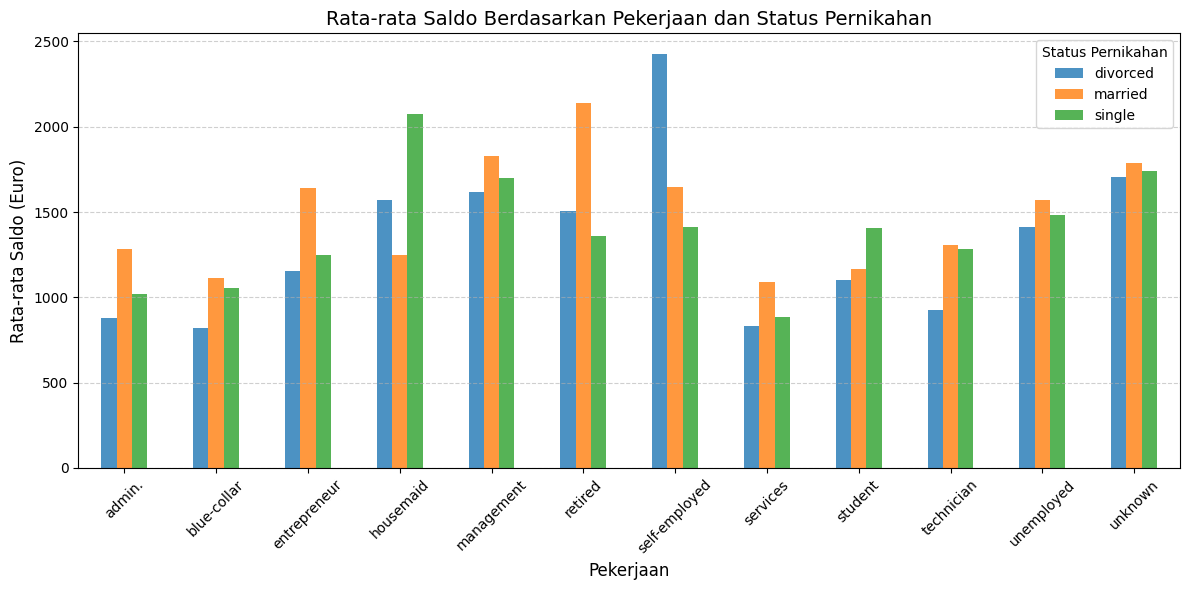

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='job',
    columns='marital',
    values='balance',
    aggfunc='mean'
)

# Visualisasi grouped bar chart
pivot.plot(kind='bar', figsize=(12, 6), alpha=0.8)
plt.title('Rata-rata Saldo Berdasarkan Pekerjaan dan Status Pernikahan', fontsize=14)
plt.xlabel('Pekerjaan', fontsize=12)
plt.ylabel('Rata-rata Saldo (Euro)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Status Pernikahan', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 2. Distribusi jumlah klien berdasarkan pendidikan dan status pernikahan

In [ ]:
pd.pivot_table(
    data=df,
    index='education',
    columns='marital',
    values='age',
    aggfunc='count'
)


marital,divorced,married,single
education,,,
primary,752,5246,853
secondary,2815,13770,6617
tertiary,1471,7038,4792
unknown,169,1160,528


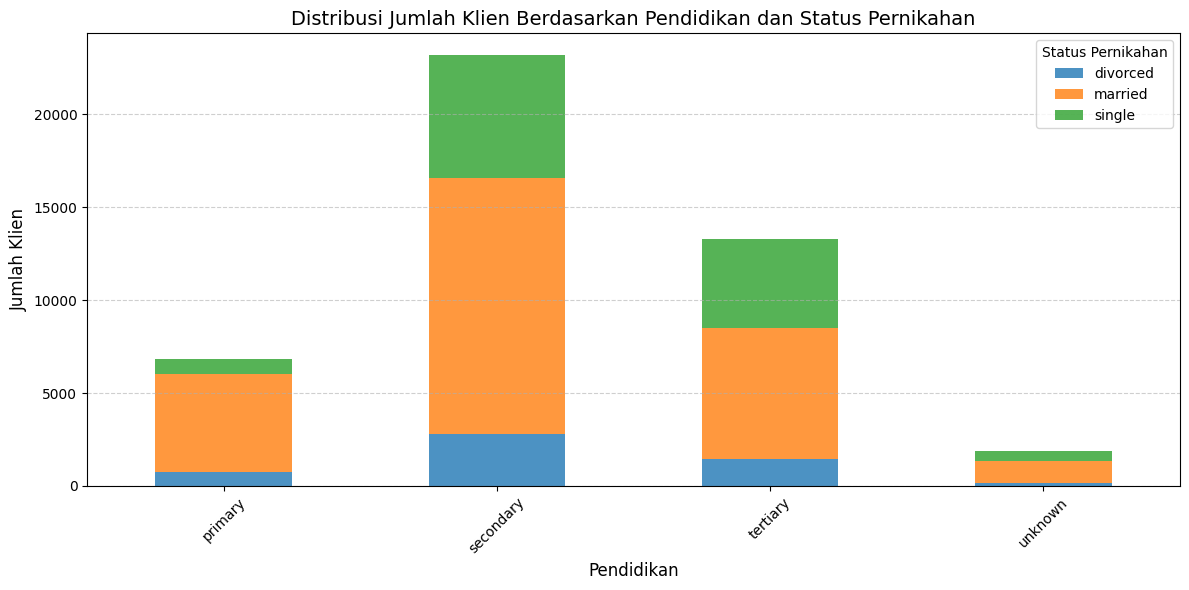

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='education',
    columns='marital',
    values='age',
    aggfunc='count'
)

# Visualisasi stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), alpha=0.8)
plt.title('Distribusi Jumlah Klien Berdasarkan Pendidikan dan Status Pernikahan', fontsize=14)
plt.xlabel('Pendidikan', fontsize=12)
plt.ylabel('Jumlah Klien', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Status Pernikahan', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 3. Rata-rata durasi kontak terakhir berdasarkan pekerjaan

In [ ]:
pd.pivot_table(
    data=df,
    index='job',
    values='duration',
    aggfunc='mean'
)


,duration
job,
admin.,246.896732
blue-collar,262.901562
entrepreneur,256.309348
housemaid,245.825000
management,253.995771
retired,287.361307
self-employed,268.157061
services,259.318729
student,246.656716


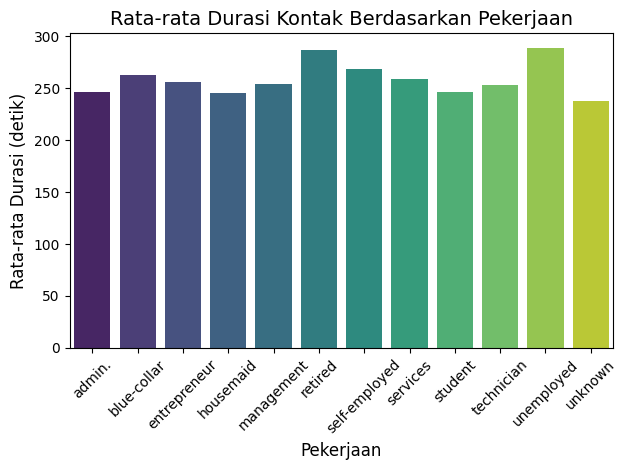

In [4]:
# Creating the pivot table
duration_by_job = pd.pivot_table(
    data=df,
    index='job',
    values='duration',
    aggfunc='mean'
).reset_index()

# Plotting the visualization
sns.barplot(data=duration_by_job, x='job', y='duration', palette='viridis')
plt.title('Rata-rata Durasi Kontak Berdasarkan Pekerjaan', fontsize=14)
plt.xlabel('Pekerjaan', fontsize=12)
plt.ylabel('Rata-rata Durasi (detik)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


### 4. Distribusi jumlah kampanye berdasarkan hasil kampanye sebelumnya (poutcome)

In [ ]:
pd.pivot_table(
    data=df,
    index='poutcome',
    values='campaign',
    aggfunc='count'
)


,campaign
poutcome,
failure,4901
other,1840
success,1511
unknown,36959


from matplotlib import pyplot as plt
_df_0['campaign'].plot(kind='hist', bins=20, title='campaign')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['campaign'].plot(kind='line', figsize=(8, 4), title='campaign')
plt.gca().spines[['top', 'right']].set_visible(False)

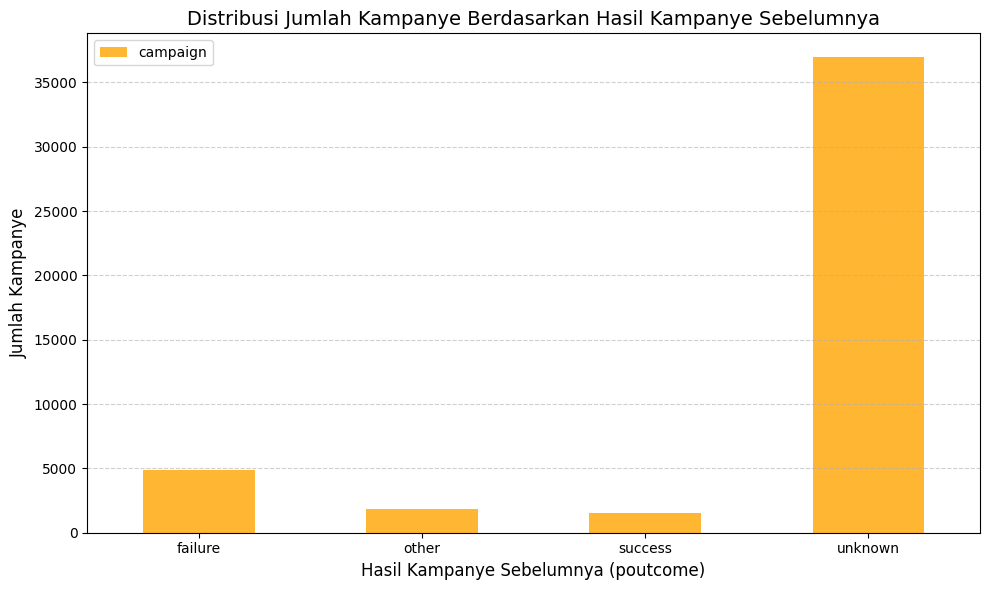

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='poutcome',
    values='campaign',
    aggfunc='count'
)

# Visualisasi bar chart
pivot.plot(kind='bar', figsize=(10, 6), color='orange', alpha=0.8)
plt.title('Distribusi Jumlah Kampanye Berdasarkan Hasil Kampanye Sebelumnya', fontsize=14)
plt.xlabel('Hasil Kampanye Sebelumnya (poutcome)', fontsize=12)
plt.ylabel('Jumlah Kampanye', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 5. Rata-rata saldo berdasarkan status pinjaman rumah dan pinjaman pribadi

In [ ]:
pd.pivot_table(
    data=df,
    index='housing',
    columns='loan',
    values='balance',
    aggfunc='mean'
)


loan,no,yes
housing,,
no,1737.606719,752.713243
yes,1256.407793,788.537898


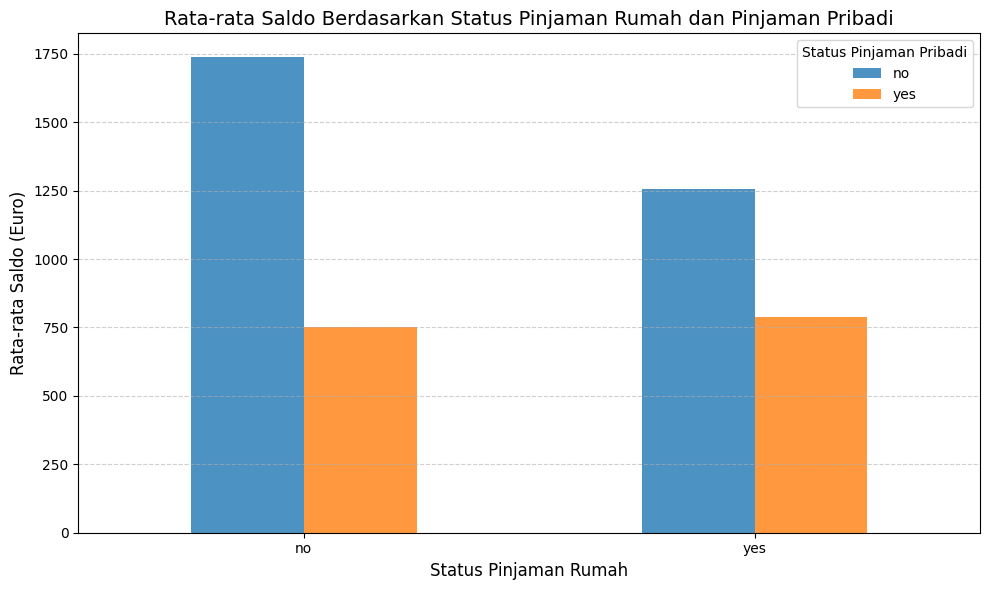

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='housing',
    columns='loan',
    values='balance',
    aggfunc='mean'
)

# Visualisasi clustered bar chart
pivot.plot(kind='bar', figsize=(10, 6), alpha=0.8)
plt.title('Rata-rata Saldo Berdasarkan Status Pinjaman Rumah dan Pinjaman Pribadi', fontsize=14)
plt.xlabel('Status Pinjaman Rumah', fontsize=12)
plt.ylabel('Rata-rata Saldo (Euro)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Status Pinjaman Pribadi', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 6. Rata-rata durasi kontak berdasarkan bulan

In [ ]:
pd.pivot_table(
    data=df,
    index='month',
    values='duration',
    aggfunc='mean'
)


,duration
month,
apr,298.098909
aug,232.402113
dec,329.327103
feb,248.298226
jan,268.220242
jul,267.975344
jun,243.087811
mar,244.400419
may,260.922272


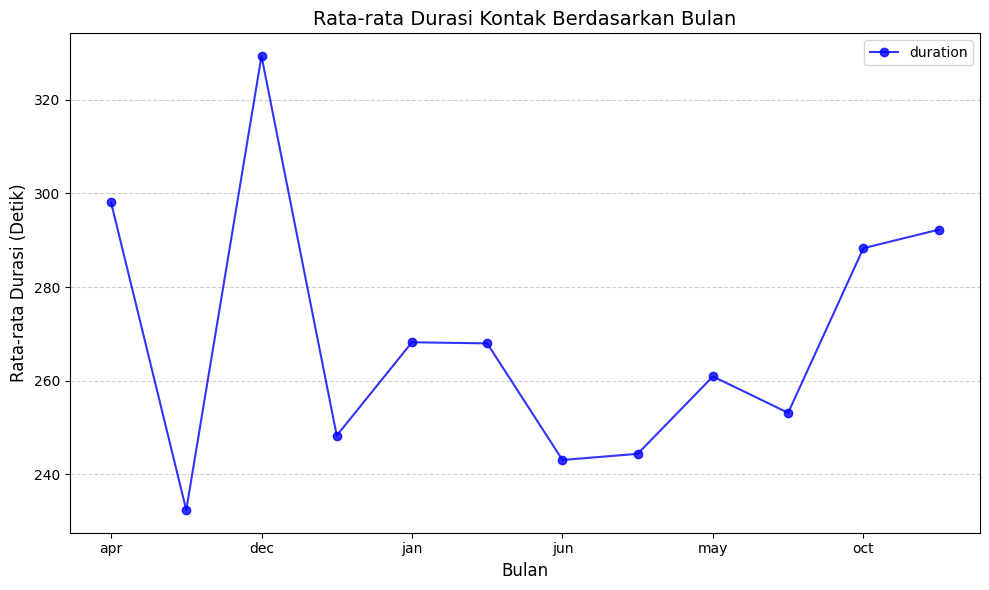

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='month',
    values='duration',
    aggfunc='mean'
)

# Visualisasi line chart
pivot.sort_index().plot(kind='line', figsize=(10, 6), marker='o', color='blue', alpha=0.8)
plt.title('Rata-rata Durasi Kontak Berdasarkan Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Durasi (Detik)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 7. Jumlah klien yang dihubungi berdasarkan pekerjaan dan pendidikan

In [ ]:
pd.pivot_table(
    data=df,
    index='job',
    columns='education',
    values='age',
    aggfunc='count'
)


education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3758,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7801,242
retired,795,984,366,119
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


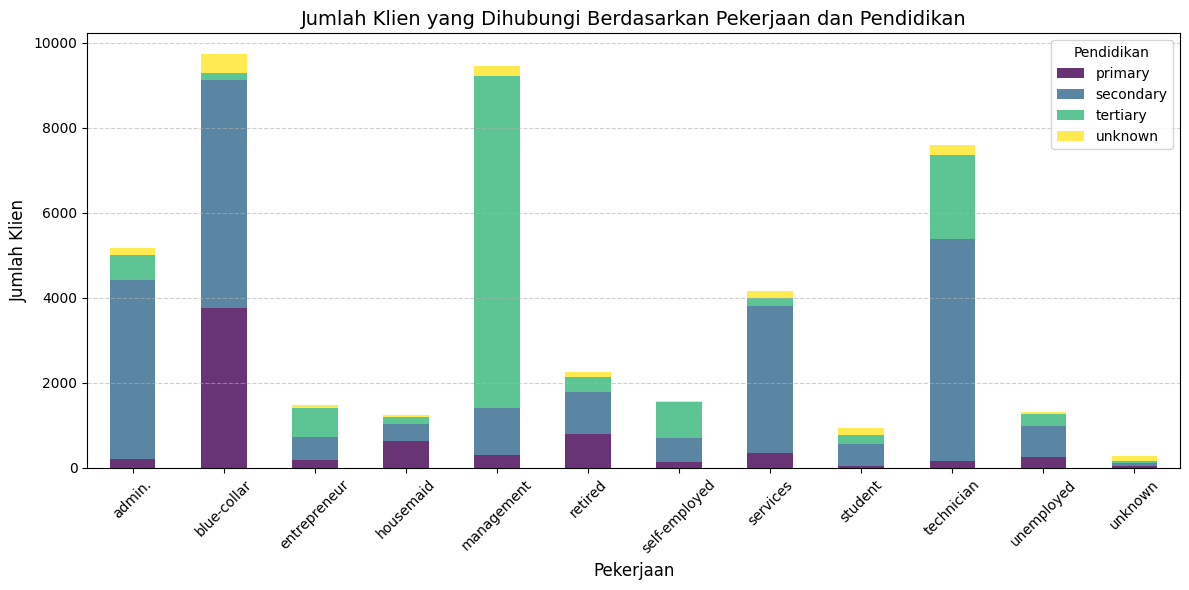

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='job',
    columns='education',
    values='age',
    aggfunc='count'
)

# Visualisasi stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), alpha=0.8, cmap='viridis')
plt.title('Jumlah Klien yang Dihubungi Berdasarkan Pekerjaan dan Pendidikan', fontsize=14)
plt.xlabel('Pekerjaan', fontsize=12)
plt.ylabel('Jumlah Klien', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Pendidikan', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 8. Jumlah klien berdasarkan status default kredit dan hasil kampanye sebelumnya

In [ ]:
pd.pivot_table(
    data=df,
    index='default',
    columns='poutcome',
    values='age',
    aggfunc='count'
)


poutcome,failure,other,success,unknown
default,,,,
no,4862,1824,1509,36201
yes,39,16,2,758


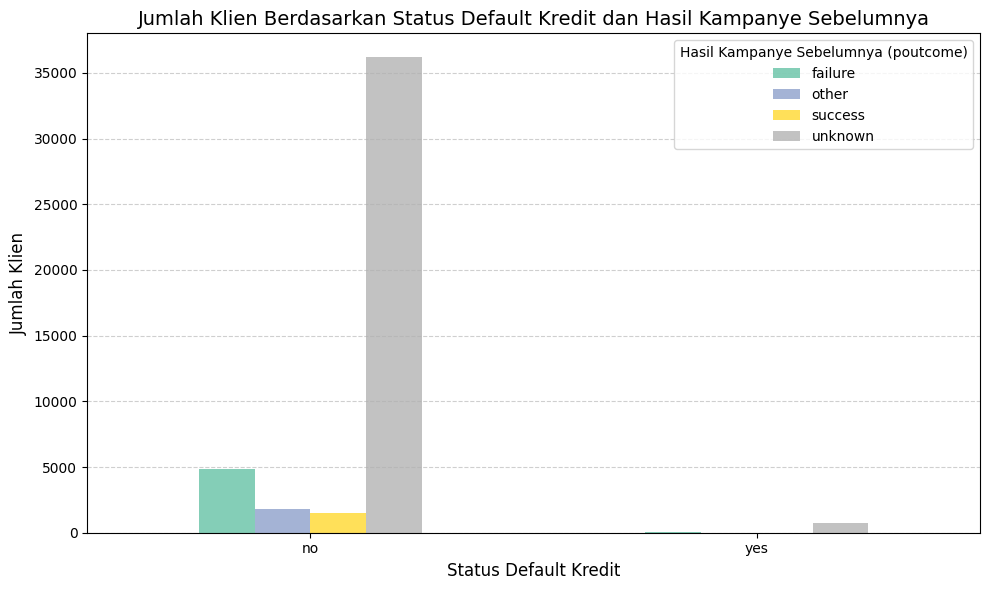

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='default',
    columns='poutcome',
    values='age',
    aggfunc='count'
)

# Visualisasi grouped bar chart
pivot.plot(kind='bar', figsize=(10, 6), alpha=0.8, cmap='Set2')
plt.title('Jumlah Klien Berdasarkan Status Default Kredit dan Hasil Kampanye Sebelumnya', fontsize=14)
plt.xlabel('Status Default Kredit', fontsize=12)
plt.ylabel('Jumlah Klien', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Hasil Kampanye Sebelumnya (poutcome)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 9. Rata-rata saldo berdasarkan status pernikahan dan hasil kampanye

In [ ]:
pd.pivot_table(
    data=df,
    index='marital',
    columns='y',
    values='balance',
    aggfunc='mean'
)


y,no,yes
marital,,
divorced,1107.095747,1707.964630
married,1370.746228,1915.810163
single,1235.869921,1674.875523


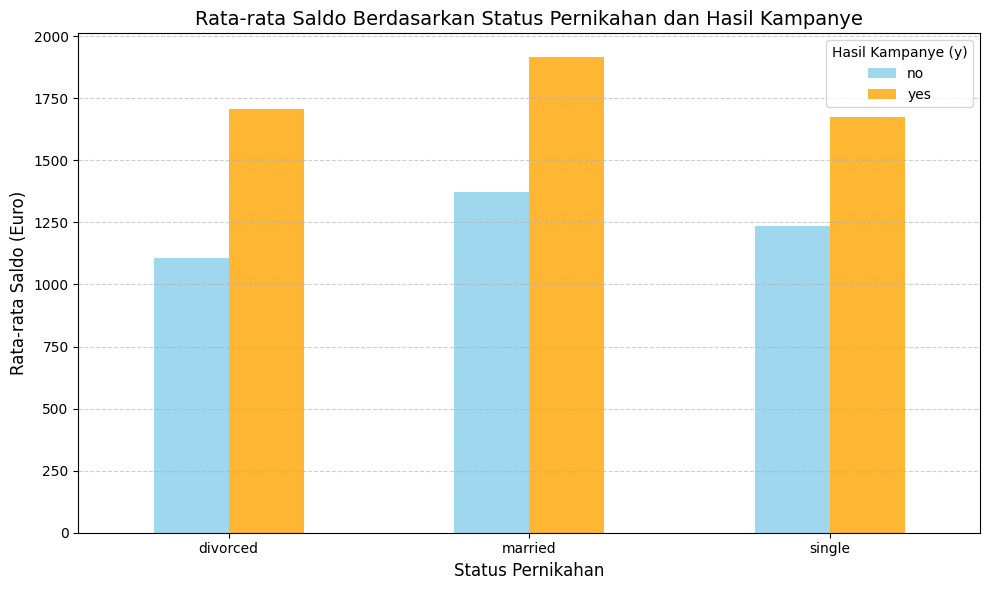

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='marital',
    columns='y',
    values='balance',
    aggfunc='mean'
)

# Visualisasi grouped bar chart
pivot.plot(kind='bar', figsize=(10, 6), alpha=0.8, color=['skyblue', 'orange'])
plt.title('Rata-rata Saldo Berdasarkan Status Pernikahan dan Hasil Kampanye', fontsize=14)
plt.xlabel('Status Pernikahan', fontsize=12)
plt.ylabel('Rata-rata Saldo (Euro)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Hasil Kampanye (y)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 10. Jumlah klien berdasarkan kontak komunikasi dan hasil kampanye

In [ ]:
pd.pivot_table(
    data=df,
    index='contact',
    columns='y',
    values='age',
    aggfunc='count'
)


y,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


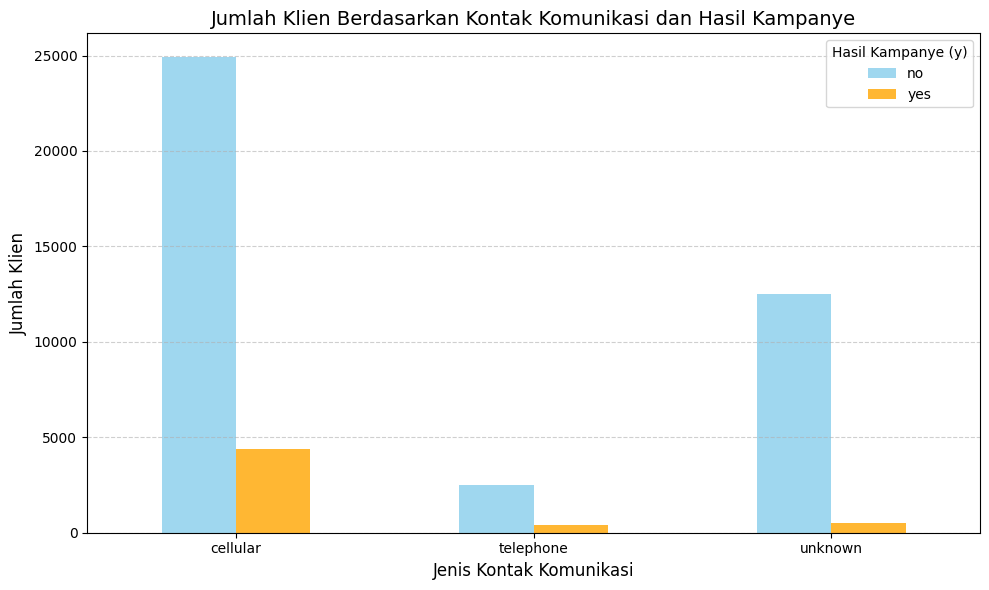

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='contact',
    columns='y',
    values='age',
    aggfunc='count'
)

# Visualisasi grouped bar chart
pivot.plot(kind='bar', figsize=(10, 6), alpha=0.8, color=['skyblue', 'orange'])
plt.title('Jumlah Klien Berdasarkan Kontak Komunikasi dan Hasil Kampanye', fontsize=14)
plt.xlabel('Jenis Kontak Komunikasi', fontsize=12)
plt.ylabel('Jumlah Klien', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Hasil Kampanye (y)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 11. Rata-rata umur berdasarkan hasil kampanye (y) dan jenis pekerjaan (job)

In [ ]:
pd.pivot_table(
    data=df,
    index='job',
    columns='y',
    values='age',
    aggfunc='mean',
    fill_value=0
)


y,no,yes
job,,
admin.,39.266300,39.459588
blue-collar,40.143506,38.776836
entrepreneur,42.145894,42.691057
housemaid,46.140584,49.266055
management,40.534878,39.914681
retired,59.912471,67.434109
self-employed,40.712644,38.786096
services,38.863144,37.479675
student,26.862481,25.747212


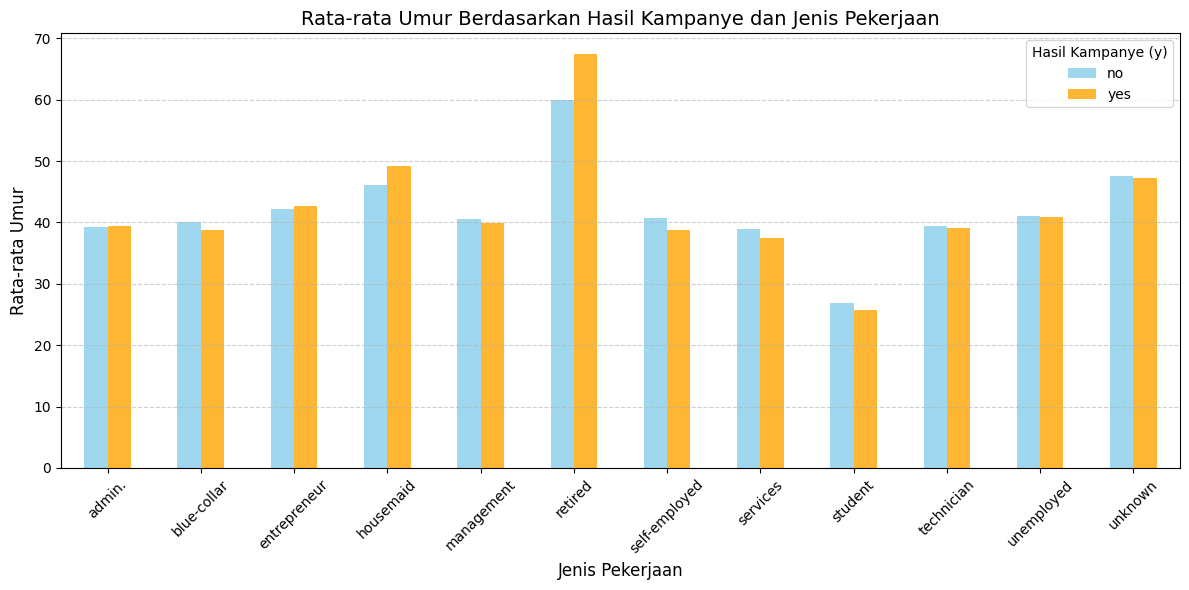

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='job',
    columns='y',
    values='age',
    aggfunc='mean',
    fill_value=0
)

# Visualisasi grouped bar chart
pivot.plot(kind='bar', figsize=(12, 6), alpha=0.8, color=['skyblue', 'orange'])
plt.title('Rata-rata Umur Berdasarkan Hasil Kampanye dan Jenis Pekerjaan', fontsize=14)
plt.xlabel('Jenis Pekerjaan', fontsize=12)
plt.ylabel('Rata-rata Umur', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Hasil Kampanye (y)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 12. Distribusi jumlah kontak berdasarkan bulan dan hasil kampanye

In [ ]:
pd.pivot_table(
    data=df,
    index='month',
    columns='y',
    values='campaign',
    aggfunc='count',
    fill_value=0
)


y,no,yes
month,,
apr,2355,577
aug,5559,688
dec,114,100
feb,2208,441
jan,1261,142
jul,6268,627
jun,4795,546
mar,229,248
may,12841,925


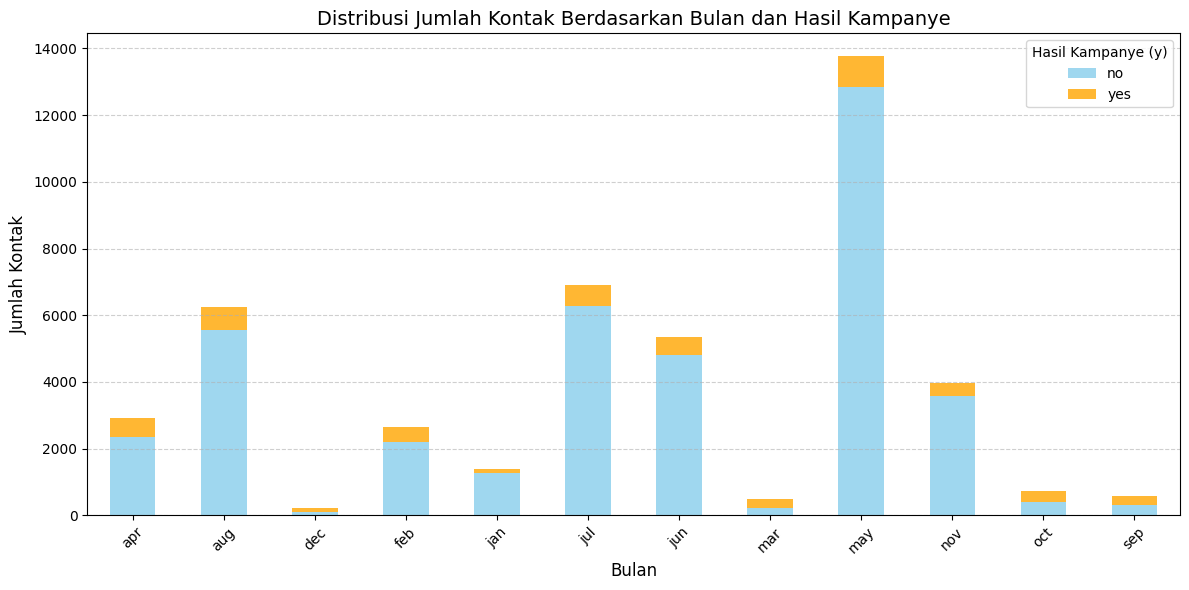

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='month',
    columns='y',
    values='campaign',
    aggfunc='count',
    fill_value=0
)

# Visualisasi stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), alpha=0.8, color=['skyblue', 'orange'])
plt.title('Distribusi Jumlah Kontak Berdasarkan Bulan dan Hasil Kampanye', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Kontak', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Hasil Kampanye (y)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 13. Jumlah kontak kampanye sebelumnya (previous) berdasarkan hasil kampanye sebelumnya (poutcome) dan status pernikahan

In [ ]:
pd.pivot_table(
    data=df,
    index='poutcome',
    columns='marital',
    values='previous',
    aggfunc='sum',
    fill_value=0
)


marital,divorced,married,single
poutcome,,,
failure,1574,8374,4248
other,907,4073,2397
success,390,2686,1571
unknown,0,13,4


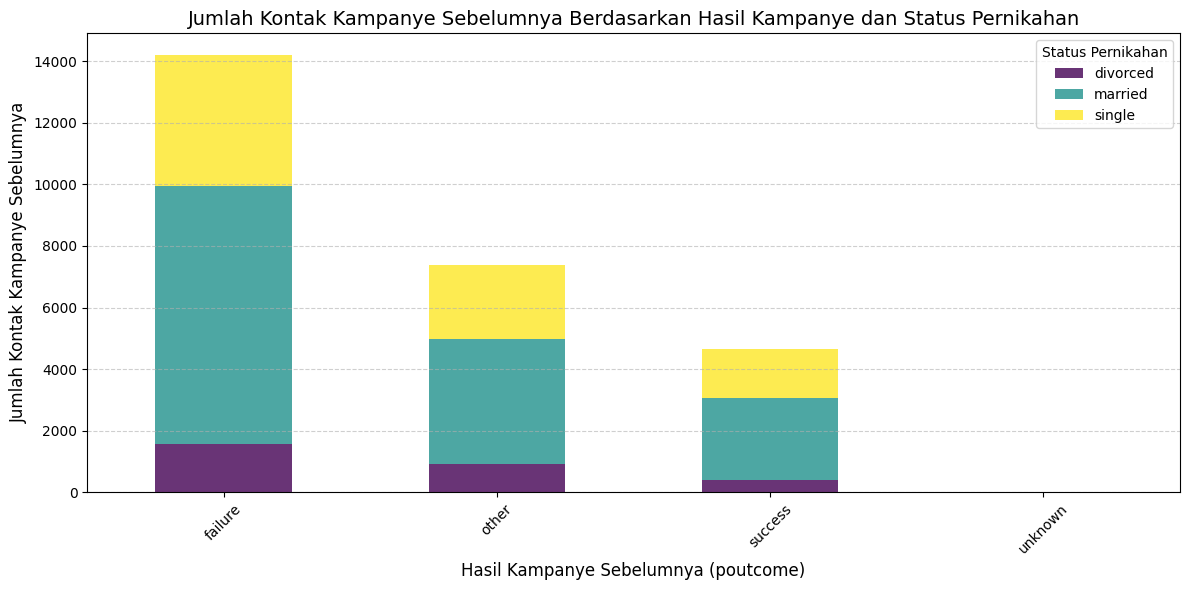

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='poutcome',
    columns='marital',
    values='previous',
    aggfunc='sum',
    fill_value=0
)

# Visualisasi stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), alpha=0.8, cmap='viridis')
plt.title('Jumlah Kontak Kampanye Sebelumnya Berdasarkan Hasil Kampanye dan Status Pernikahan', fontsize=14)
plt.xlabel('Hasil Kampanye Sebelumnya (poutcome)', fontsize=12)
plt.ylabel('Jumlah Kontak Kampanye Sebelumnya', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Status Pernikahan', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 14. Proporsi klien yang memiliki pinjaman rumah berdasarkan tingkat pendidikan

In [ ]:
pd.pivot_table(
    data=df,
    index='education',
    columns='housing',
    values='age',
    aggfunc='count',
    fill_value=0
)


housing,no,yes
education,,
primary,2957,3894
secondary,9164,14038
tertiary,6923,6378
unknown,1037,820


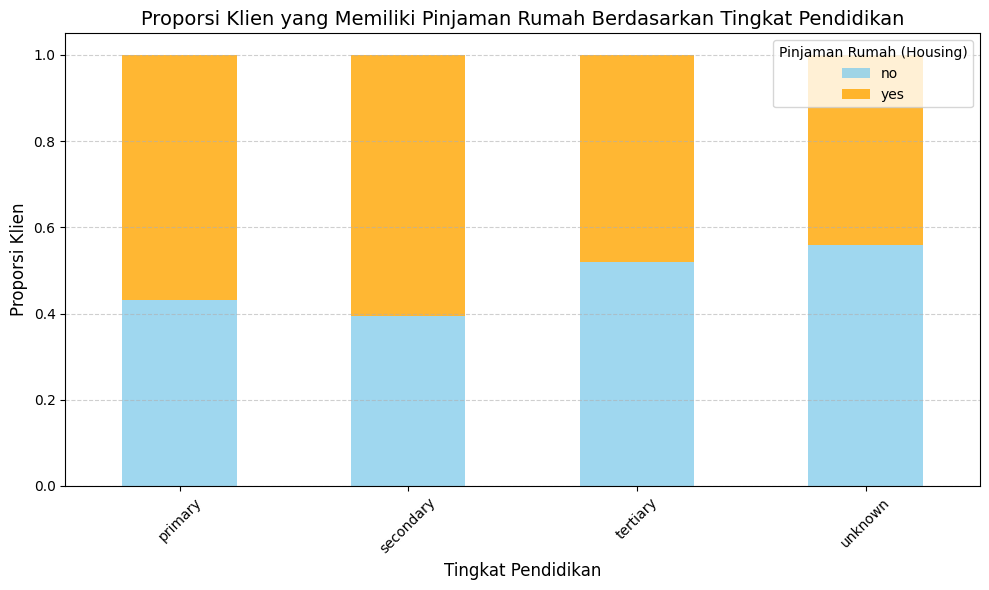

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='education',
    columns='housing',
    values='age',
    aggfunc='count',
    fill_value=0
)

# Normalisasi untuk mendapatkan proporsi
pivot_prop = pivot.div(pivot.sum(axis=1), axis=0)

# Visualisasi stacked bar chart
pivot_prop.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8, color=['skyblue', 'orange'])
plt.title('Proporsi Klien yang Memiliki Pinjaman Rumah Berdasarkan Tingkat Pendidikan', fontsize=14)
plt.xlabel('Tingkat Pendidikan', fontsize=12)
plt.ylabel('Proporsi Klien', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Pinjaman Rumah (Housing)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 15. Rata-rata saldo berdasarkan hasil kampanye (y) dan jenis kontak komunikasi (contact)

In [ ]:
pd.pivot_table(
    data=df,
    index='contact',
    columns='y',
    values='balance',
    aggfunc='mean',
    fill_value=0
)


y,no,yes
contact,,
cellular,1333.772195,1763.795834
telephone,1638.855326,2867.189744
unknown,1176.243475,1355.745283


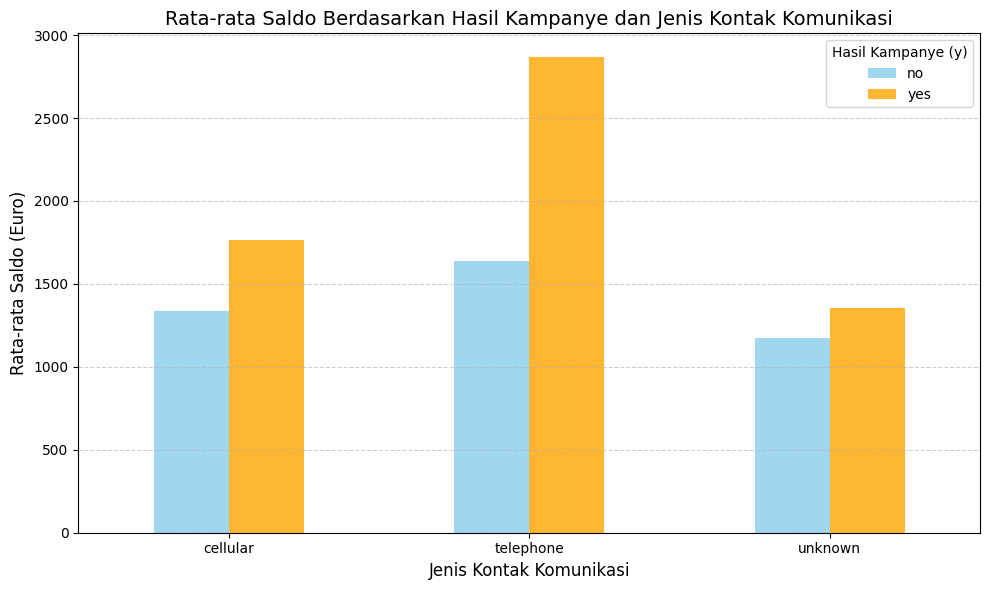

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='contact',
    columns='y',
    values='balance',
    aggfunc='mean',
    fill_value=0
)

# Visualisasi grouped bar chart
pivot.plot(kind='bar', figsize=(10, 6), alpha=0.8, color=['skyblue', 'orange'])
plt.title('Rata-rata Saldo Berdasarkan Hasil Kampanye dan Jenis Kontak Komunikasi', fontsize=14)
plt.xlabel('Jenis Kontak Komunikasi', fontsize=12)
plt.ylabel('Rata-rata Saldo (Euro)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Hasil Kampanye (y)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 16. Distribusi hasil kampanye (y) berdasarkan status pinjaman pribadi (loan) dan status pernikahan

In [ ]:
pd.pivot_table(
    data=df,
    index='loan',
    columns='marital',
    values='age',
    aggfunc='count',
    fill_value=0
)


marital,divorced,married,single
loan,,,
no,4286,22554,11127
yes,921,4660,1663


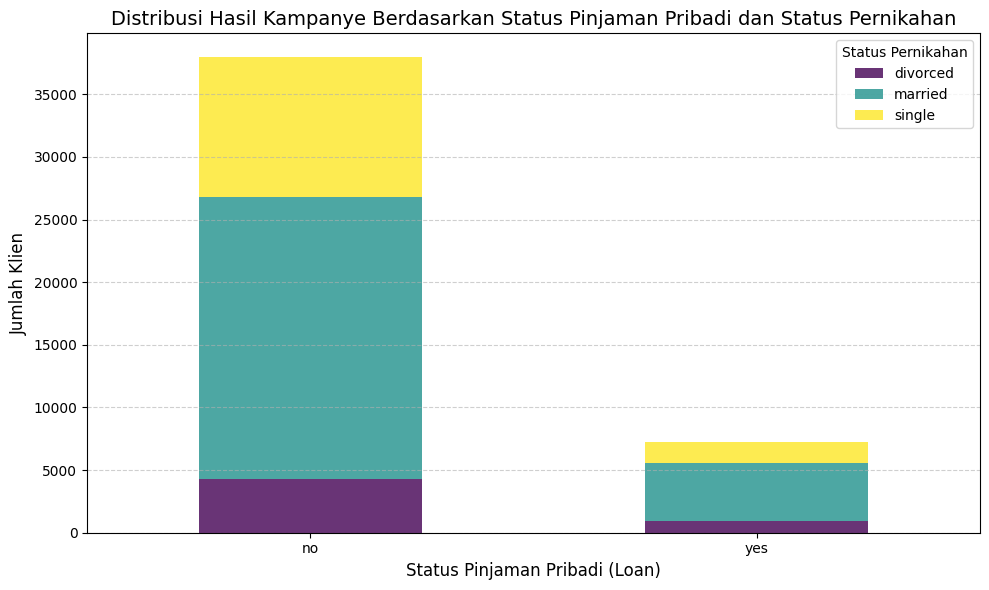

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='loan',
    columns='marital',
    values='age',
    aggfunc='count',
    fill_value=0
)

# Visualisasi stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.8, cmap='viridis')
plt.title('Distribusi Hasil Kampanye Berdasarkan Status Pinjaman Pribadi dan Status Pernikahan', fontsize=14)
plt.xlabel('Status Pinjaman Pribadi (Loan)', fontsize=12)
plt.ylabel('Jumlah Klien', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Status Pernikahan', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 17. Rata-rata durasi kontak berdasarkan hasil kampanye (y) dan status default kredit

In [ ]:
pd.pivot_table(
    data=df,
    index='default',
    columns='y',
    values='duration',
    aggfunc='mean',
    fill_value=0
)


y,no,yes
default,,
no,221.404862,535.982242
yes,209.786370,669.461538


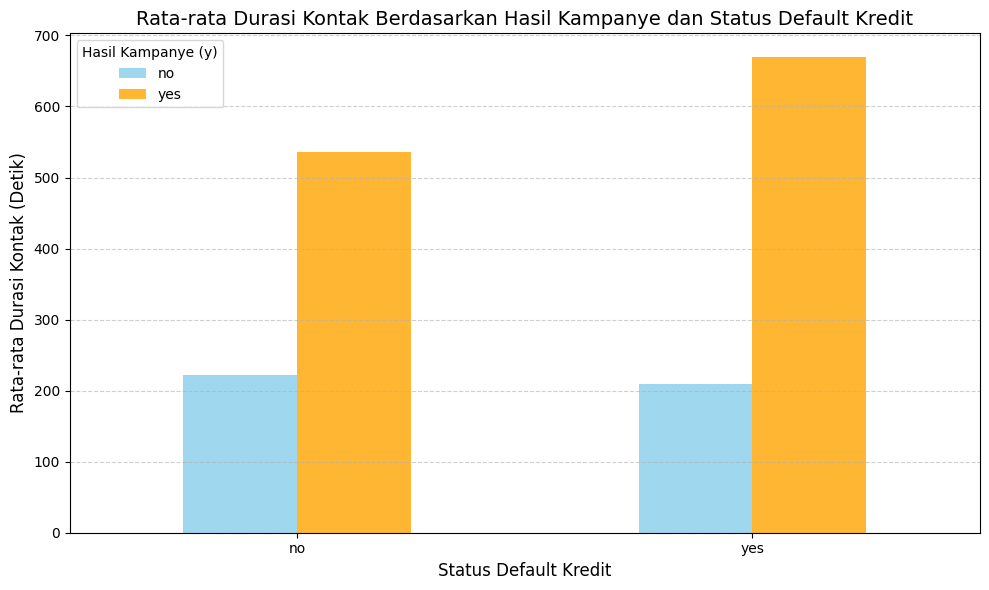

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='default',
    columns='y',
    values='duration',
    aggfunc='mean',
    fill_value=0
)

# Visualisasi grouped bar chart
pivot.plot(kind='bar', figsize=(10, 6), alpha=0.8, color=['skyblue', 'orange'])
plt.title('Rata-rata Durasi Kontak Berdasarkan Hasil Kampanye dan Status Default Kredit', fontsize=14)
plt.xlabel('Status Default Kredit', fontsize=12)
plt.ylabel('Rata-rata Durasi Kontak (Detik)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Hasil Kampanye (y)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 18. Distribusi jumlah kontak berdasarkan pekerjaan dan jenis komunikasi

In [ ]:
pd.pivot_table(
    data=df,
    index='job',
    columns='contact',
    values='campaign',
    aggfunc='count',
    fill_value=0
)


contact,cellular,telephone,unknown
job,,,
admin.,3354,289,1528
blue-collar,5156,611,3965
entrepreneur,954,87,446
housemaid,748,151,341
management,7021,471,1966
retired,1370,405,489
self-employed,1084,98,397
services,2498,228,1428
student,697,99,142


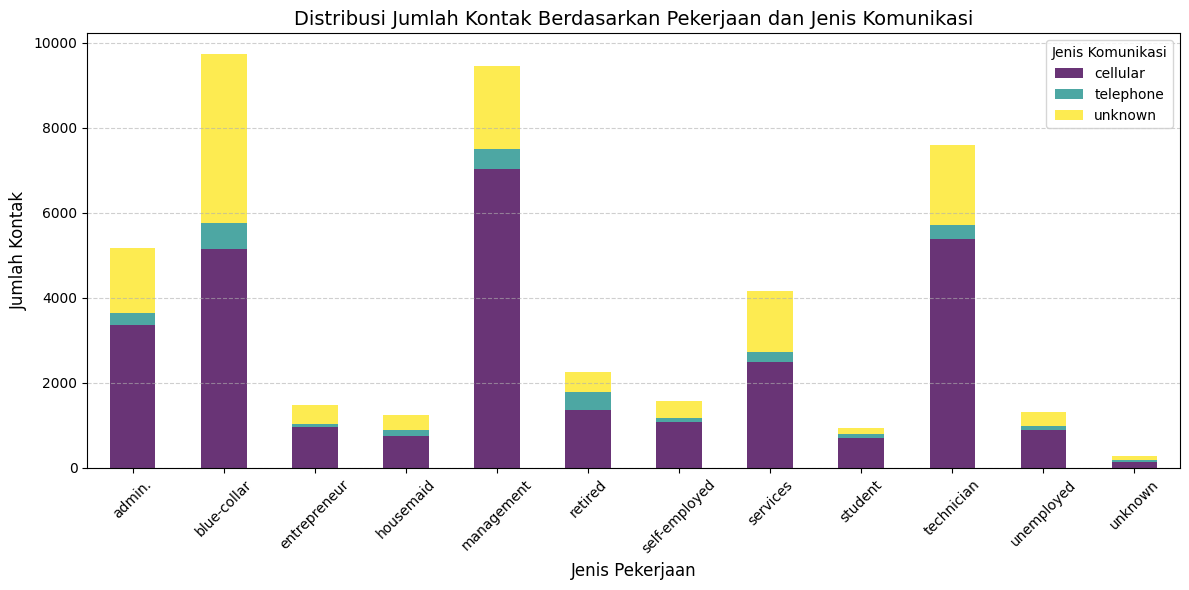

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='job',
    columns='contact',
    values='campaign',
    aggfunc='count',
    fill_value=0
)

# Visualisasi stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(12, 6), alpha=0.8, cmap='viridis')
plt.title('Distribusi Jumlah Kontak Berdasarkan Pekerjaan dan Jenis Komunikasi', fontsize=14)
plt.xlabel('Jenis Pekerjaan', fontsize=12)
plt.ylabel('Jumlah Kontak', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Jenis Komunikasi', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 19. Distribusi Jumlah Klien Berdasarkan Status Kontak Sebelumnya (pdays)

In [ ]:
pd.pivot_table(
    data=df,
    index=df['pdays'].apply(lambda x: "Not Contacted" if x == -1 else "Contacted"),
    values='pdays',
    aggfunc='count',
    fill_value=0
)


,pdays
pdays,
Contacted,8257
Not Contacted,36954


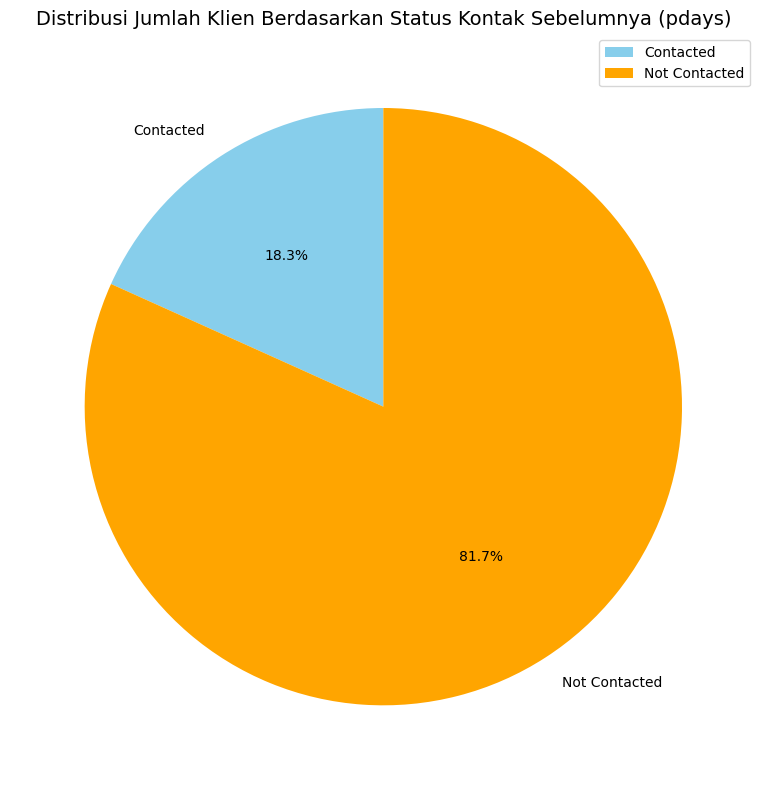

In [ ]:
# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index=df['pdays'].apply(lambda x: "Not Contacted" if x == -1 else "Contacted"),
    values='pdays',
    aggfunc='count',
    fill_value=0
)

# Visualisasi pie chart
pivot.plot(kind='pie', y='pdays', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=['skyblue', 'orange'])
plt.title('Distribusi Jumlah Klien Berdasarkan Status Kontak Sebelumnya (pdays)', fontsize=14)
plt.ylabel('')  # Menghapus label default
plt.tight_layout()
plt.show()


### 20. Jumlah klien berdasarkan pendidikan dan bulan kampanye

In [ ]:
pd.pivot_table(
    data=df,
    index='education',
    columns='month',
    values='age',
    aggfunc='count',
    fill_value=0
)


month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
education,,,,,,,,,,,,
primary,426,682,23,341,159,1083,1113,47,2353,454,97,73
secondary,1569,2670,101,1333,706,3682,2595,185,7911,1909,312,229
tertiary,827,2718,76,869,462,1856,1318,219,2946,1488,287,235
unknown,110,177,14,106,76,274,315,26,556,119,42,42


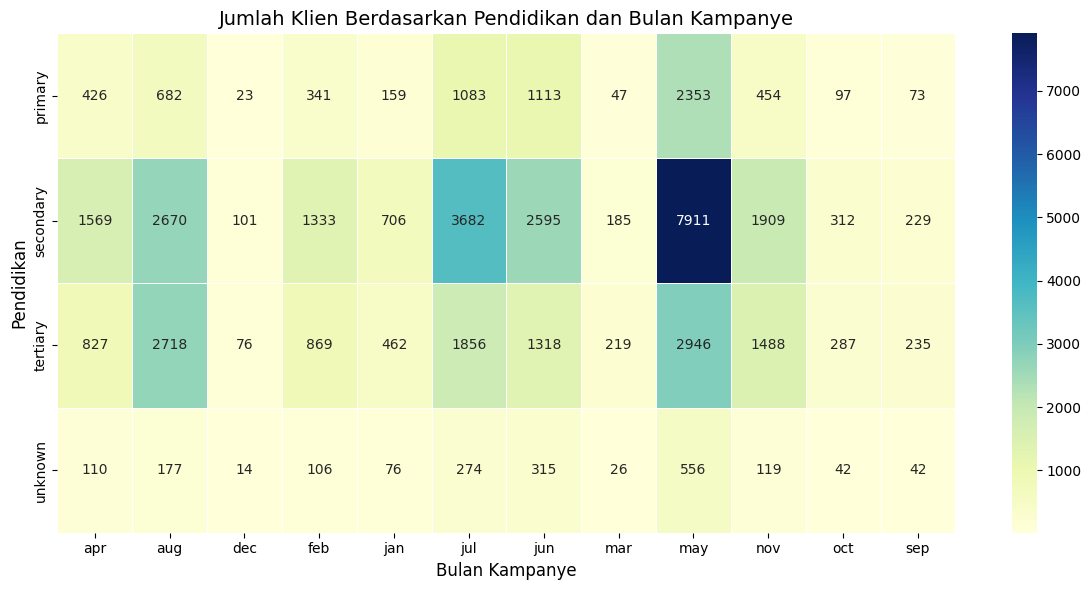

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table result
pivot = pd.pivot_table(
    data=df,
    index='education',
    columns='month',
    values='age',
    aggfunc='count',
    fill_value=0
)

# Visualisasi heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Jumlah Klien Berdasarkan Pendidikan dan Bulan Kampanye', fontsize=14)
plt.xlabel('Bulan Kampanye', fontsize=12)
plt.ylabel('Pendidikan', fontsize=12)
plt.tight_layout()
plt.show()


## Univariate Analysis

In [ ]:
# Univariate Analysis untuk Variabel Numerik
def univariate_numerical(df, numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'Distribusi {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

# Univariate Analysis untuk Variabel Kategorikal
def univariate_categorical(df, categorical_columns):
    for col in categorical_columns:
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar', color='orange', alpha=0.8)
        plt.title(f'Distribusi {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

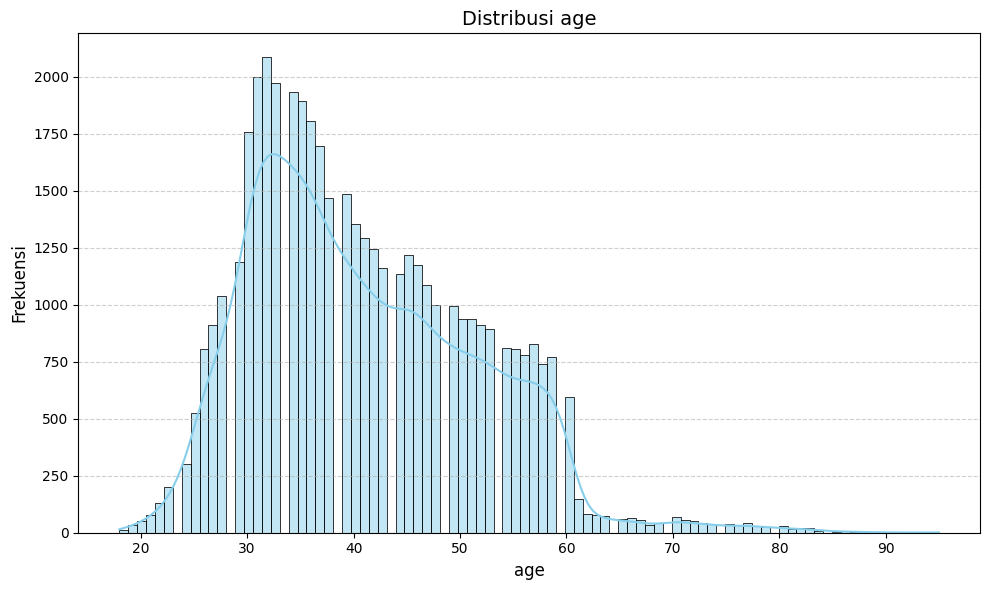

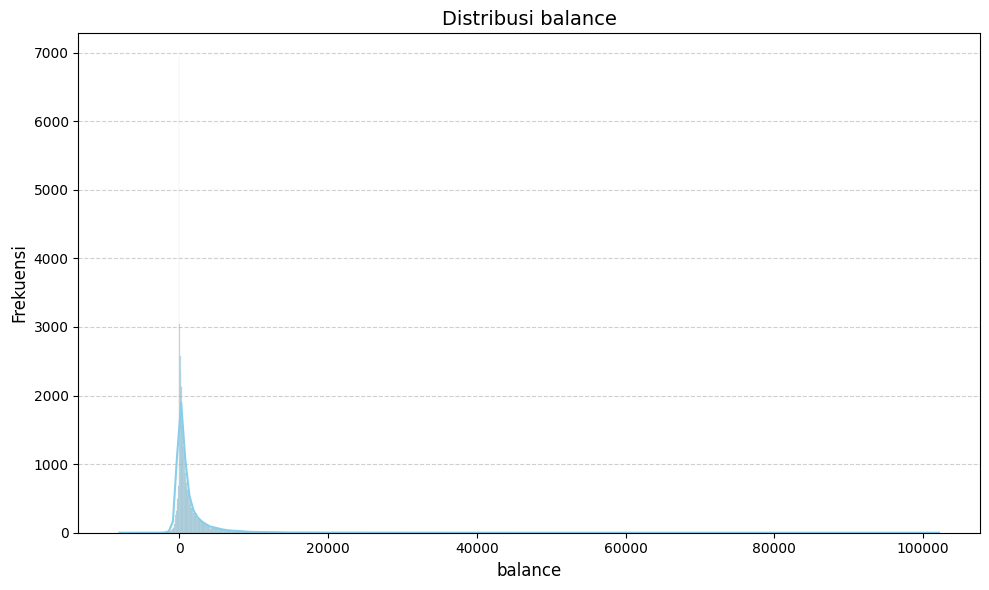

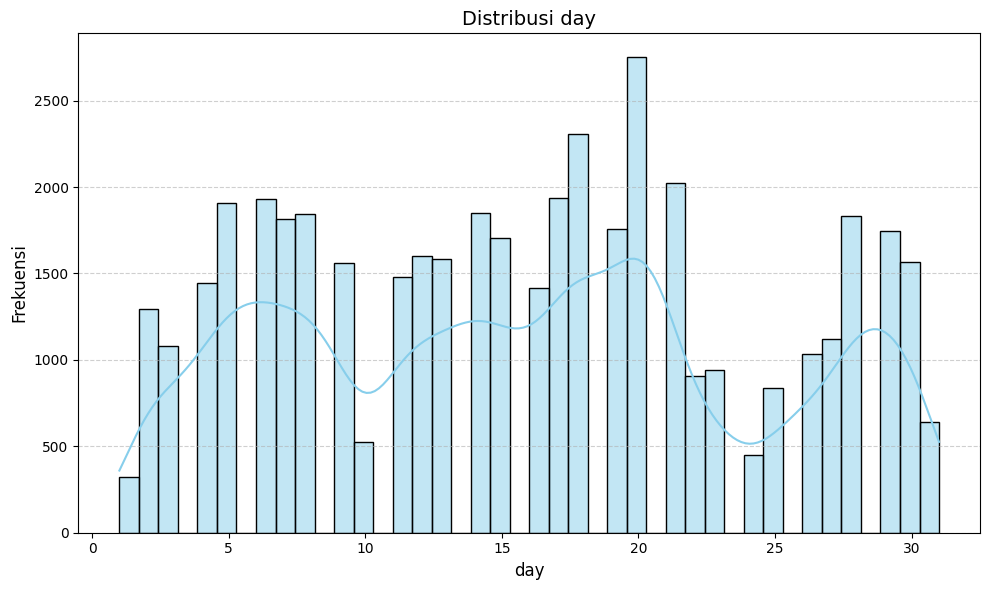

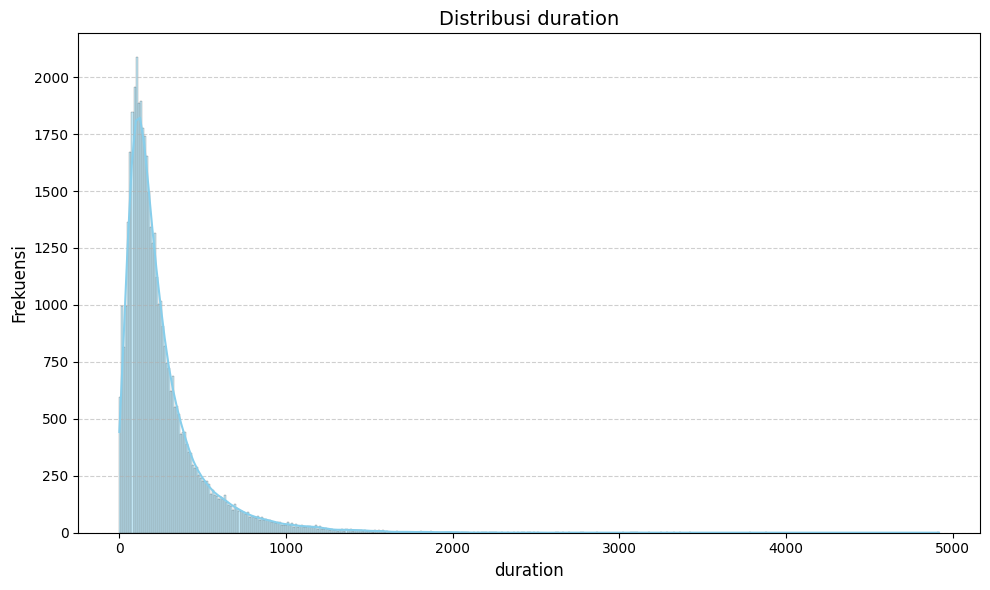

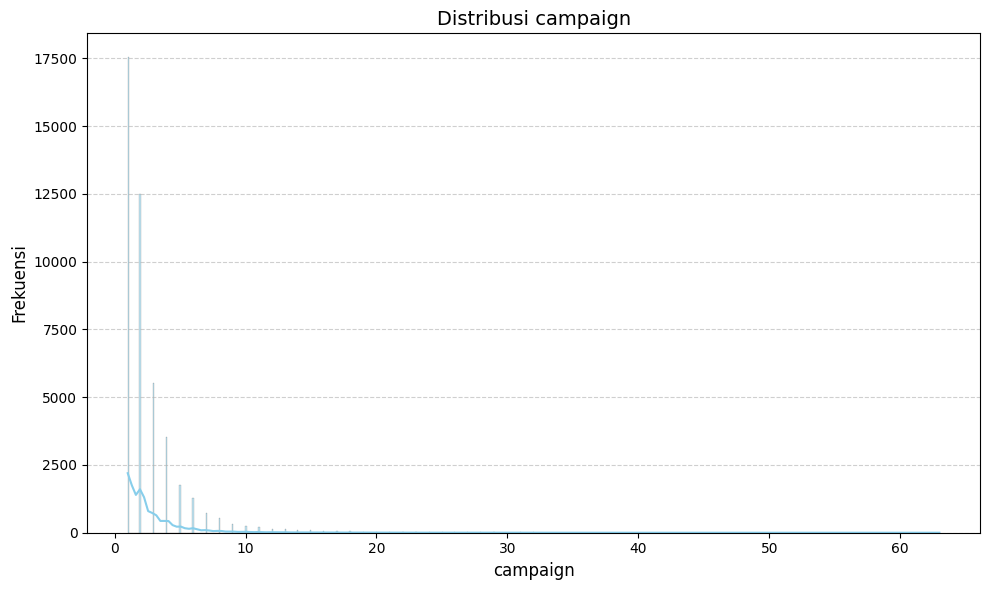

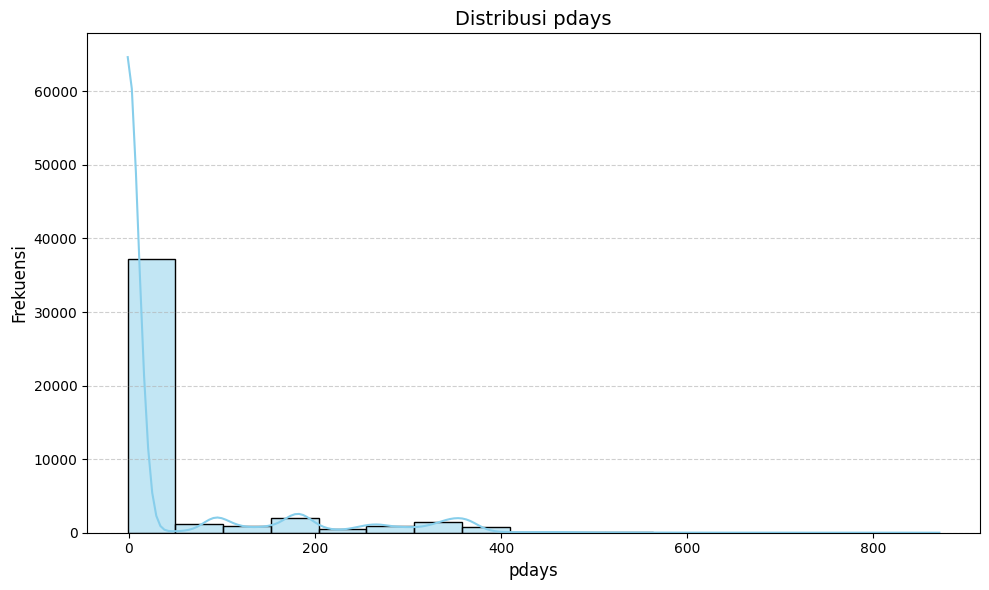

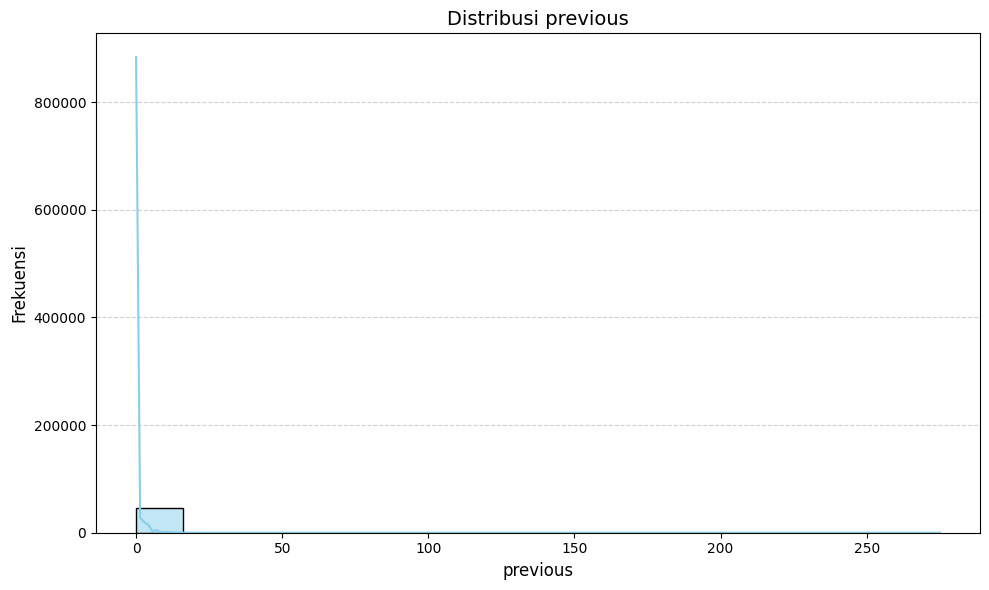

In [ ]:
univariate_numerical(df, nums)

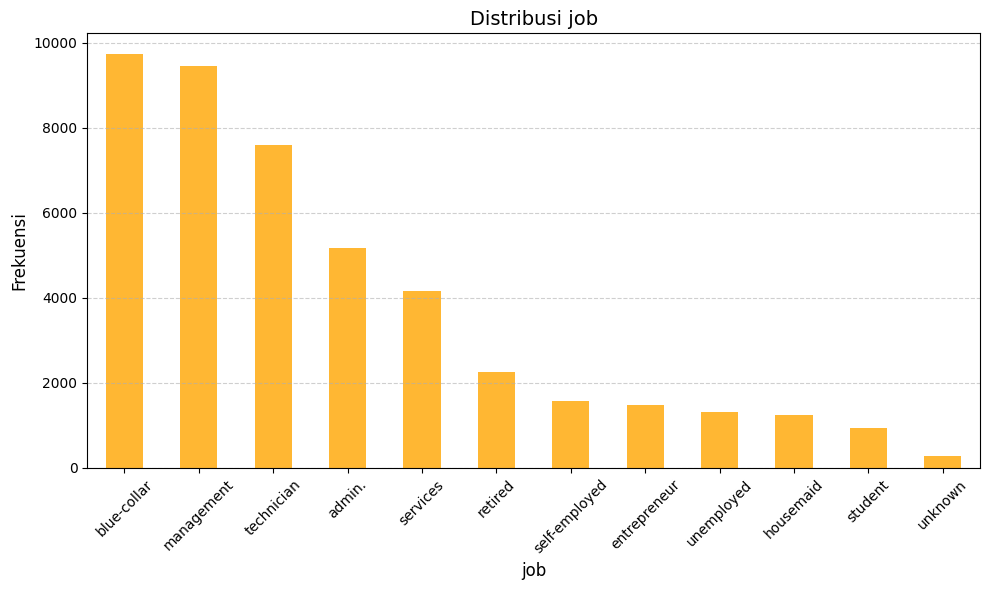

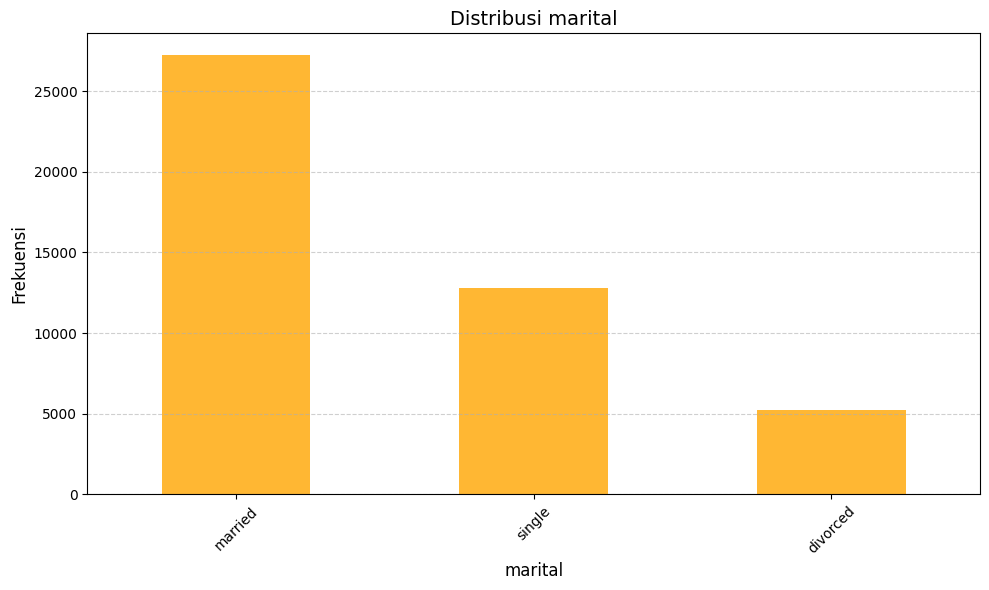

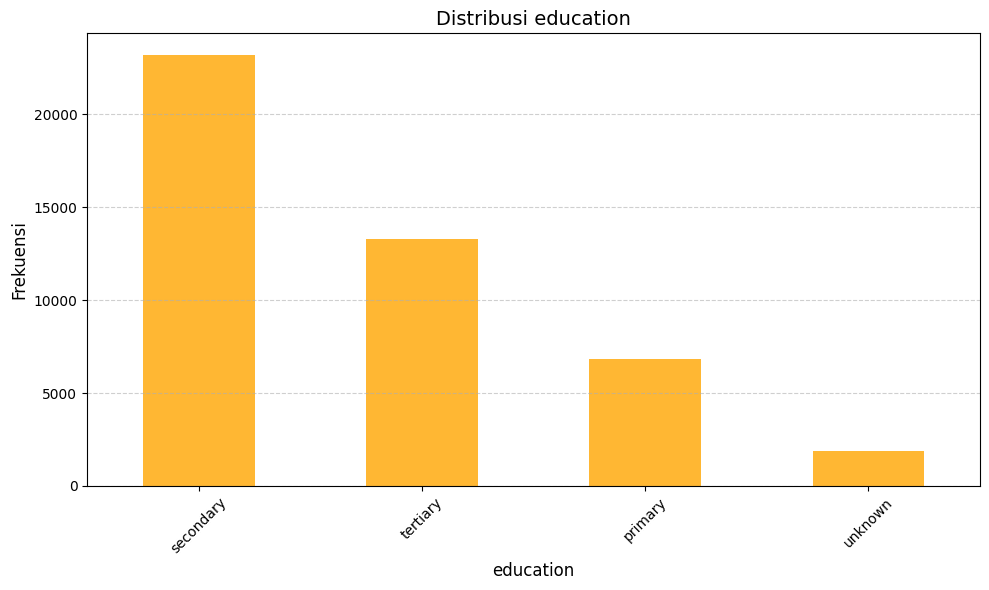

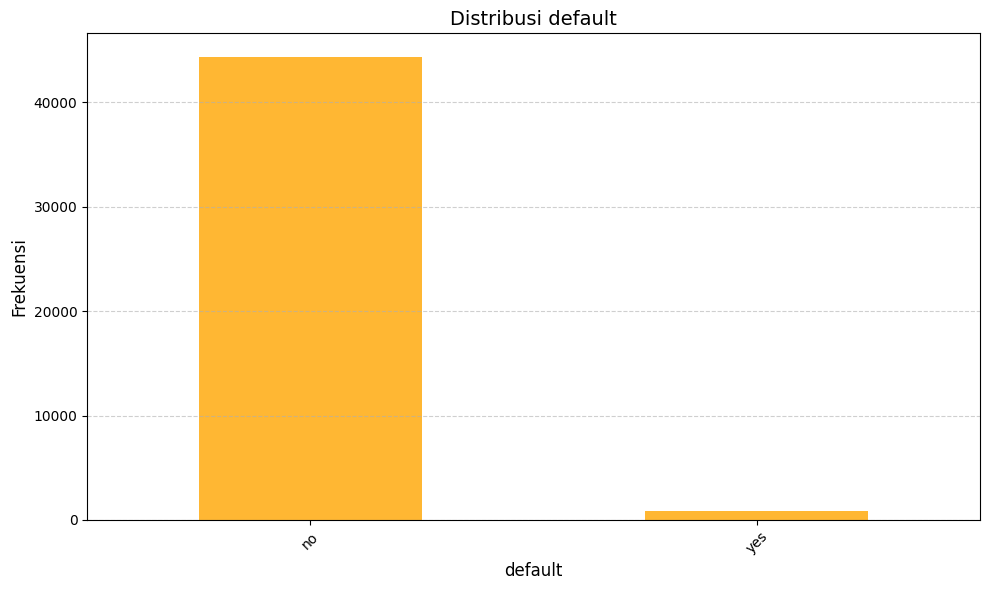

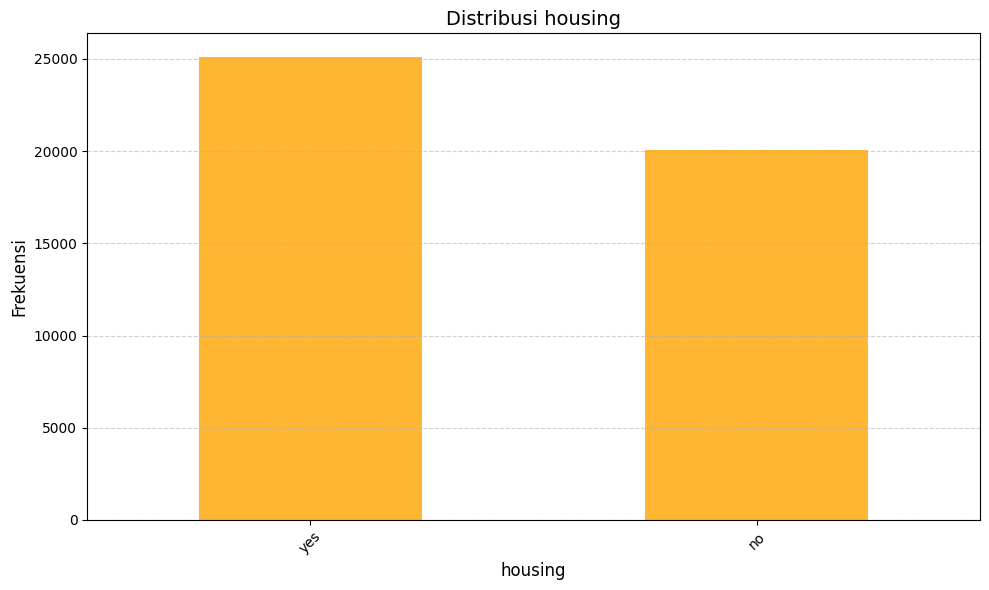

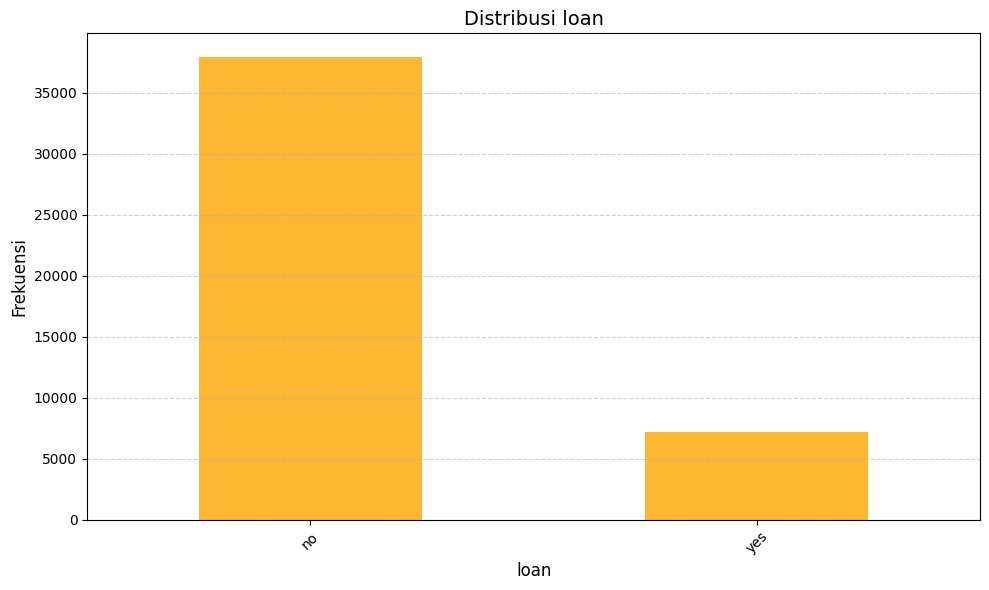

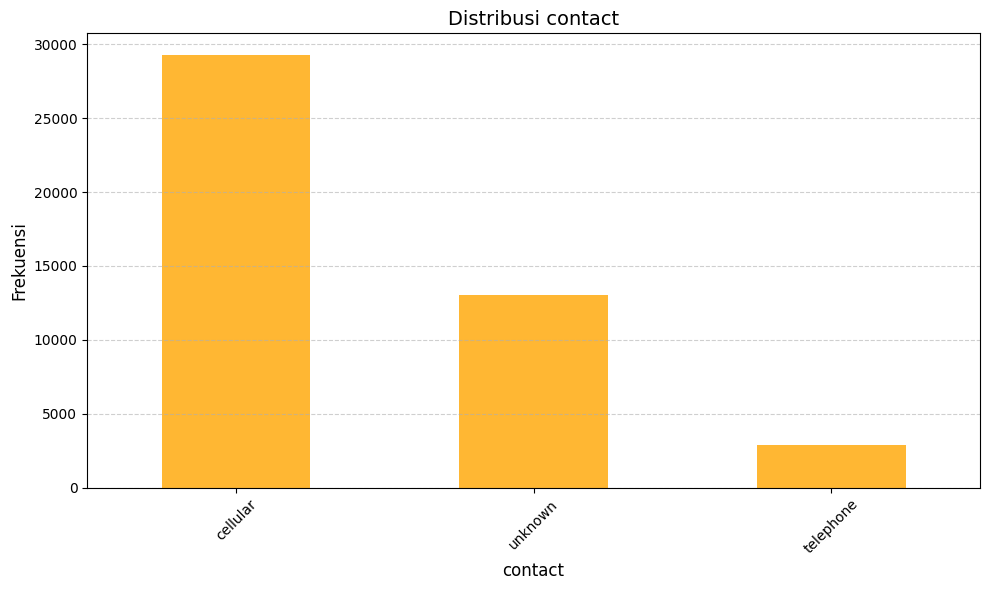

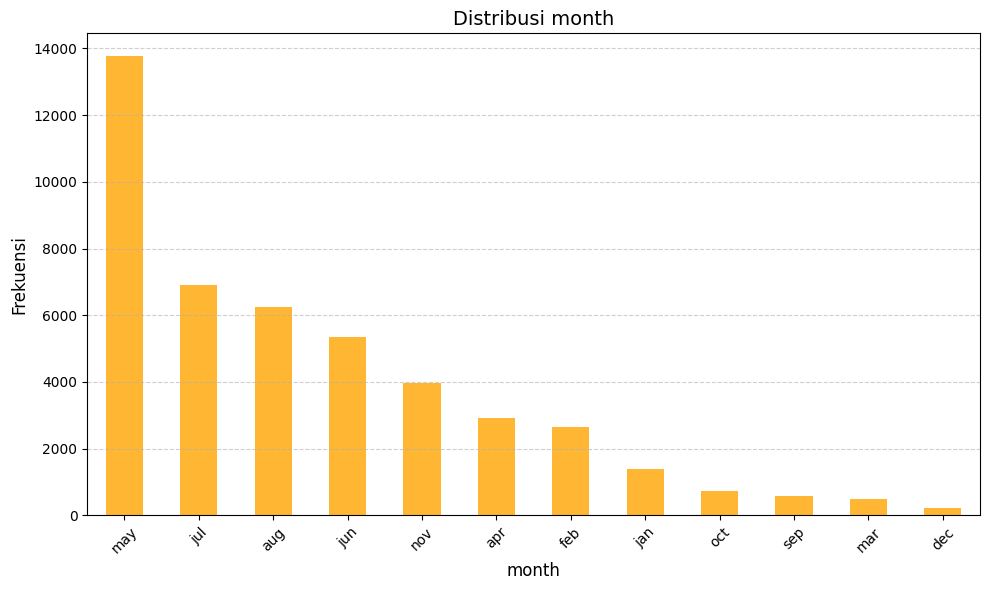

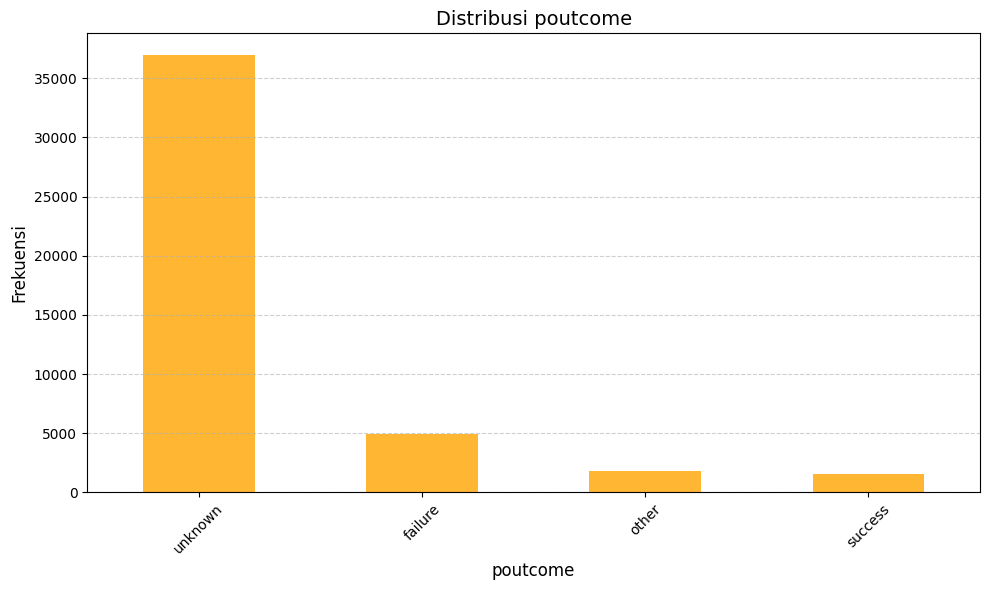

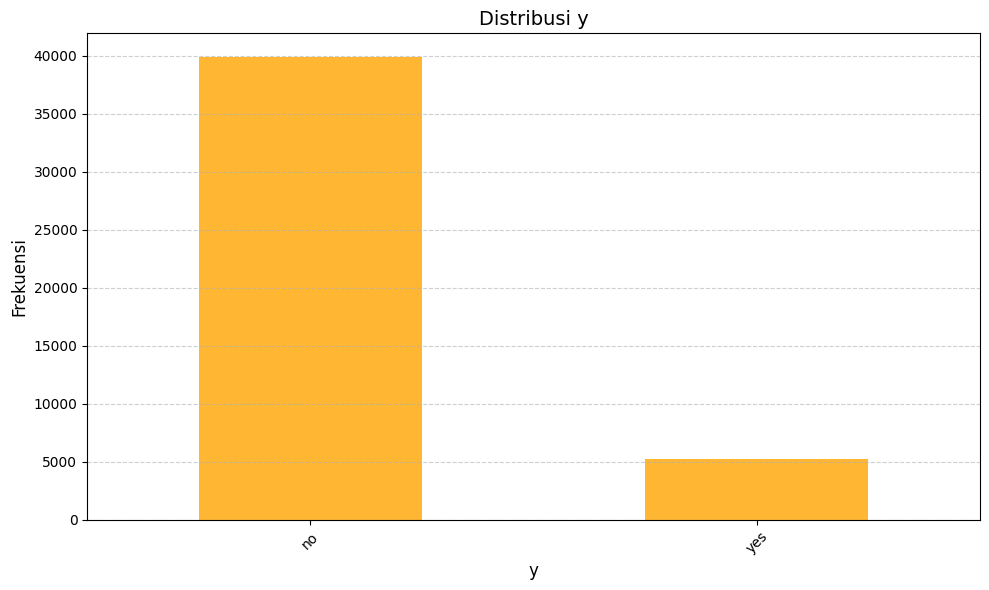

In [ ]:
univariate_categorical(df, cats)

# Analisis Korelasi

## Multivariate Analysis

## 1. Korelasi untuk Variabel Numerik (Spearman, Kendall, Pearson)

In [ ]:
def numerical_correlation(df, numerical_columns):
    methods = ['pearson', 'spearman', 'kendall']
    for method in methods:
        correlation_matrix = df[numerical_columns].corr(method=method)
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title(f'Heatmap Korelasi ({method.capitalize()}) Variabel Numerik', fontsize=14)
        plt.show()

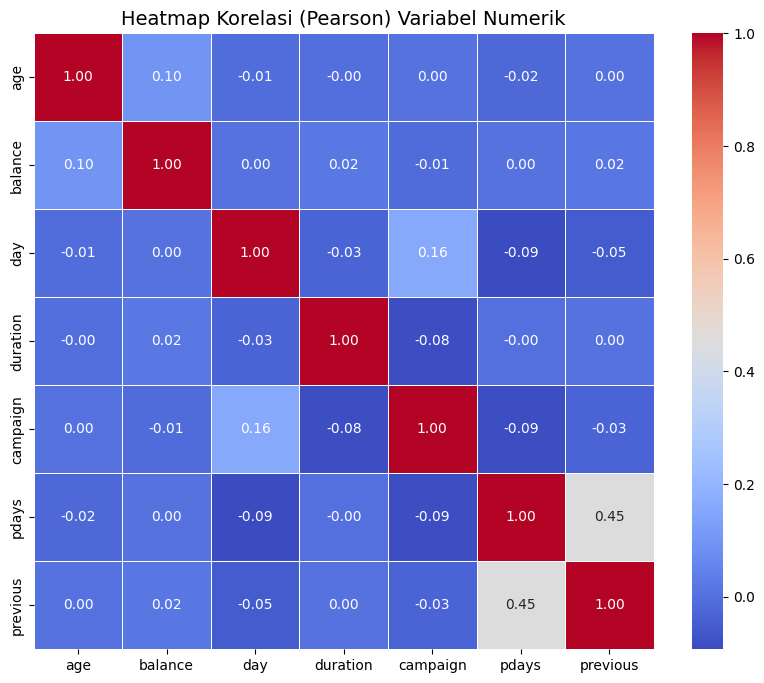

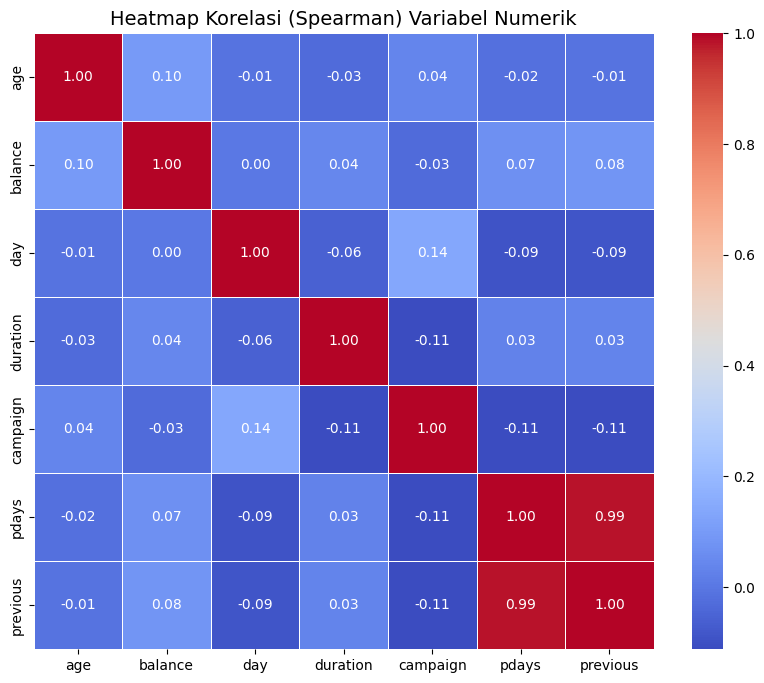

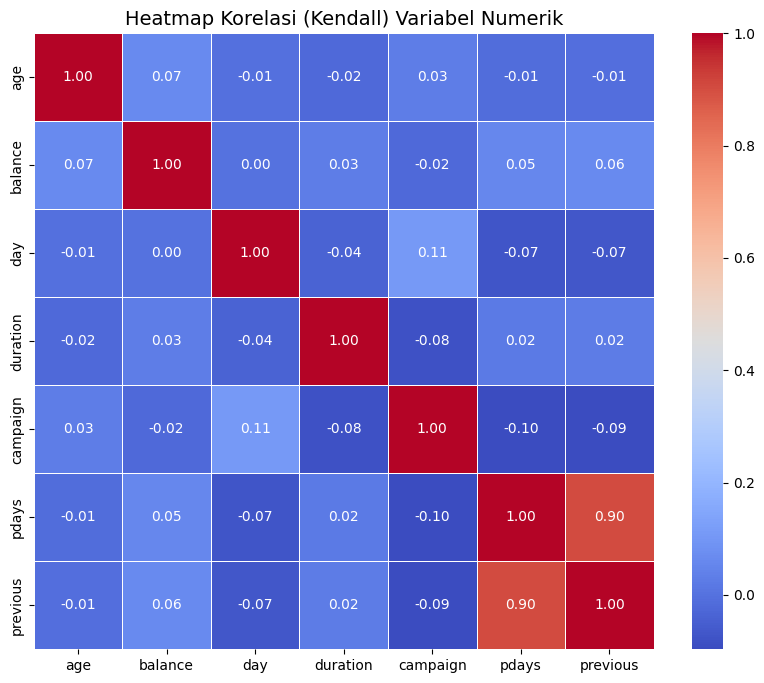

In [ ]:
numerical_correlation(df, nums)

### **Findings dari Heatmap Korelasi**

1. **Pearson**:
   - Korelasi antara variabel numerik umumnya sangat rendah, dengan nilai mendekati 0.
   - **`pdays` dan `previous`** memiliki korelasi positif yang cukup tinggi (0.45), menunjukkan hubungan yang signifikan antara keduanya.

2. **Spearman**:
   - Korelasi sedikit lebih tinggi untuk beberapa variabel dibandingkan dengan Pearson.
   - Hubungan **`pdays` dan `previous`** sangat kuat (0.99), menunjukkan bahwa semakin tinggi jumlah kontak sebelumnya, semakin lama jeda sejak kontak terakhir.

3. **Kendall**:
   - Hubungan antara **`pdays` dan `previous`** tetap kuat (0.90), mendukung hasil dari metode Spearman.
   - Korelasi antar variabel lain tetap rendah, mendekati nol, menunjukkan hubungan yang sangat lemah.

### **Kesimpulan Umum**:
- Hubungan antara variabel numerik dalam dataset ini umumnya **sangat lemah** atau **tidak signifikan**.
- Satu-satunya hubungan kuat ditemukan antara **`pdays` dan `previous`**, yang logis karena keduanya berkaitan dengan riwayat kontak sebelumnya.


## 2. Pairplot untuk Hubungan antar Variabel Numerik

In [ ]:
def pairplot_analysis(df, numerical_columns):
    sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True)
    plt.suptitle('Pairplot Variabel Numerik', y=1.02, fontsize=14)
    plt.show()


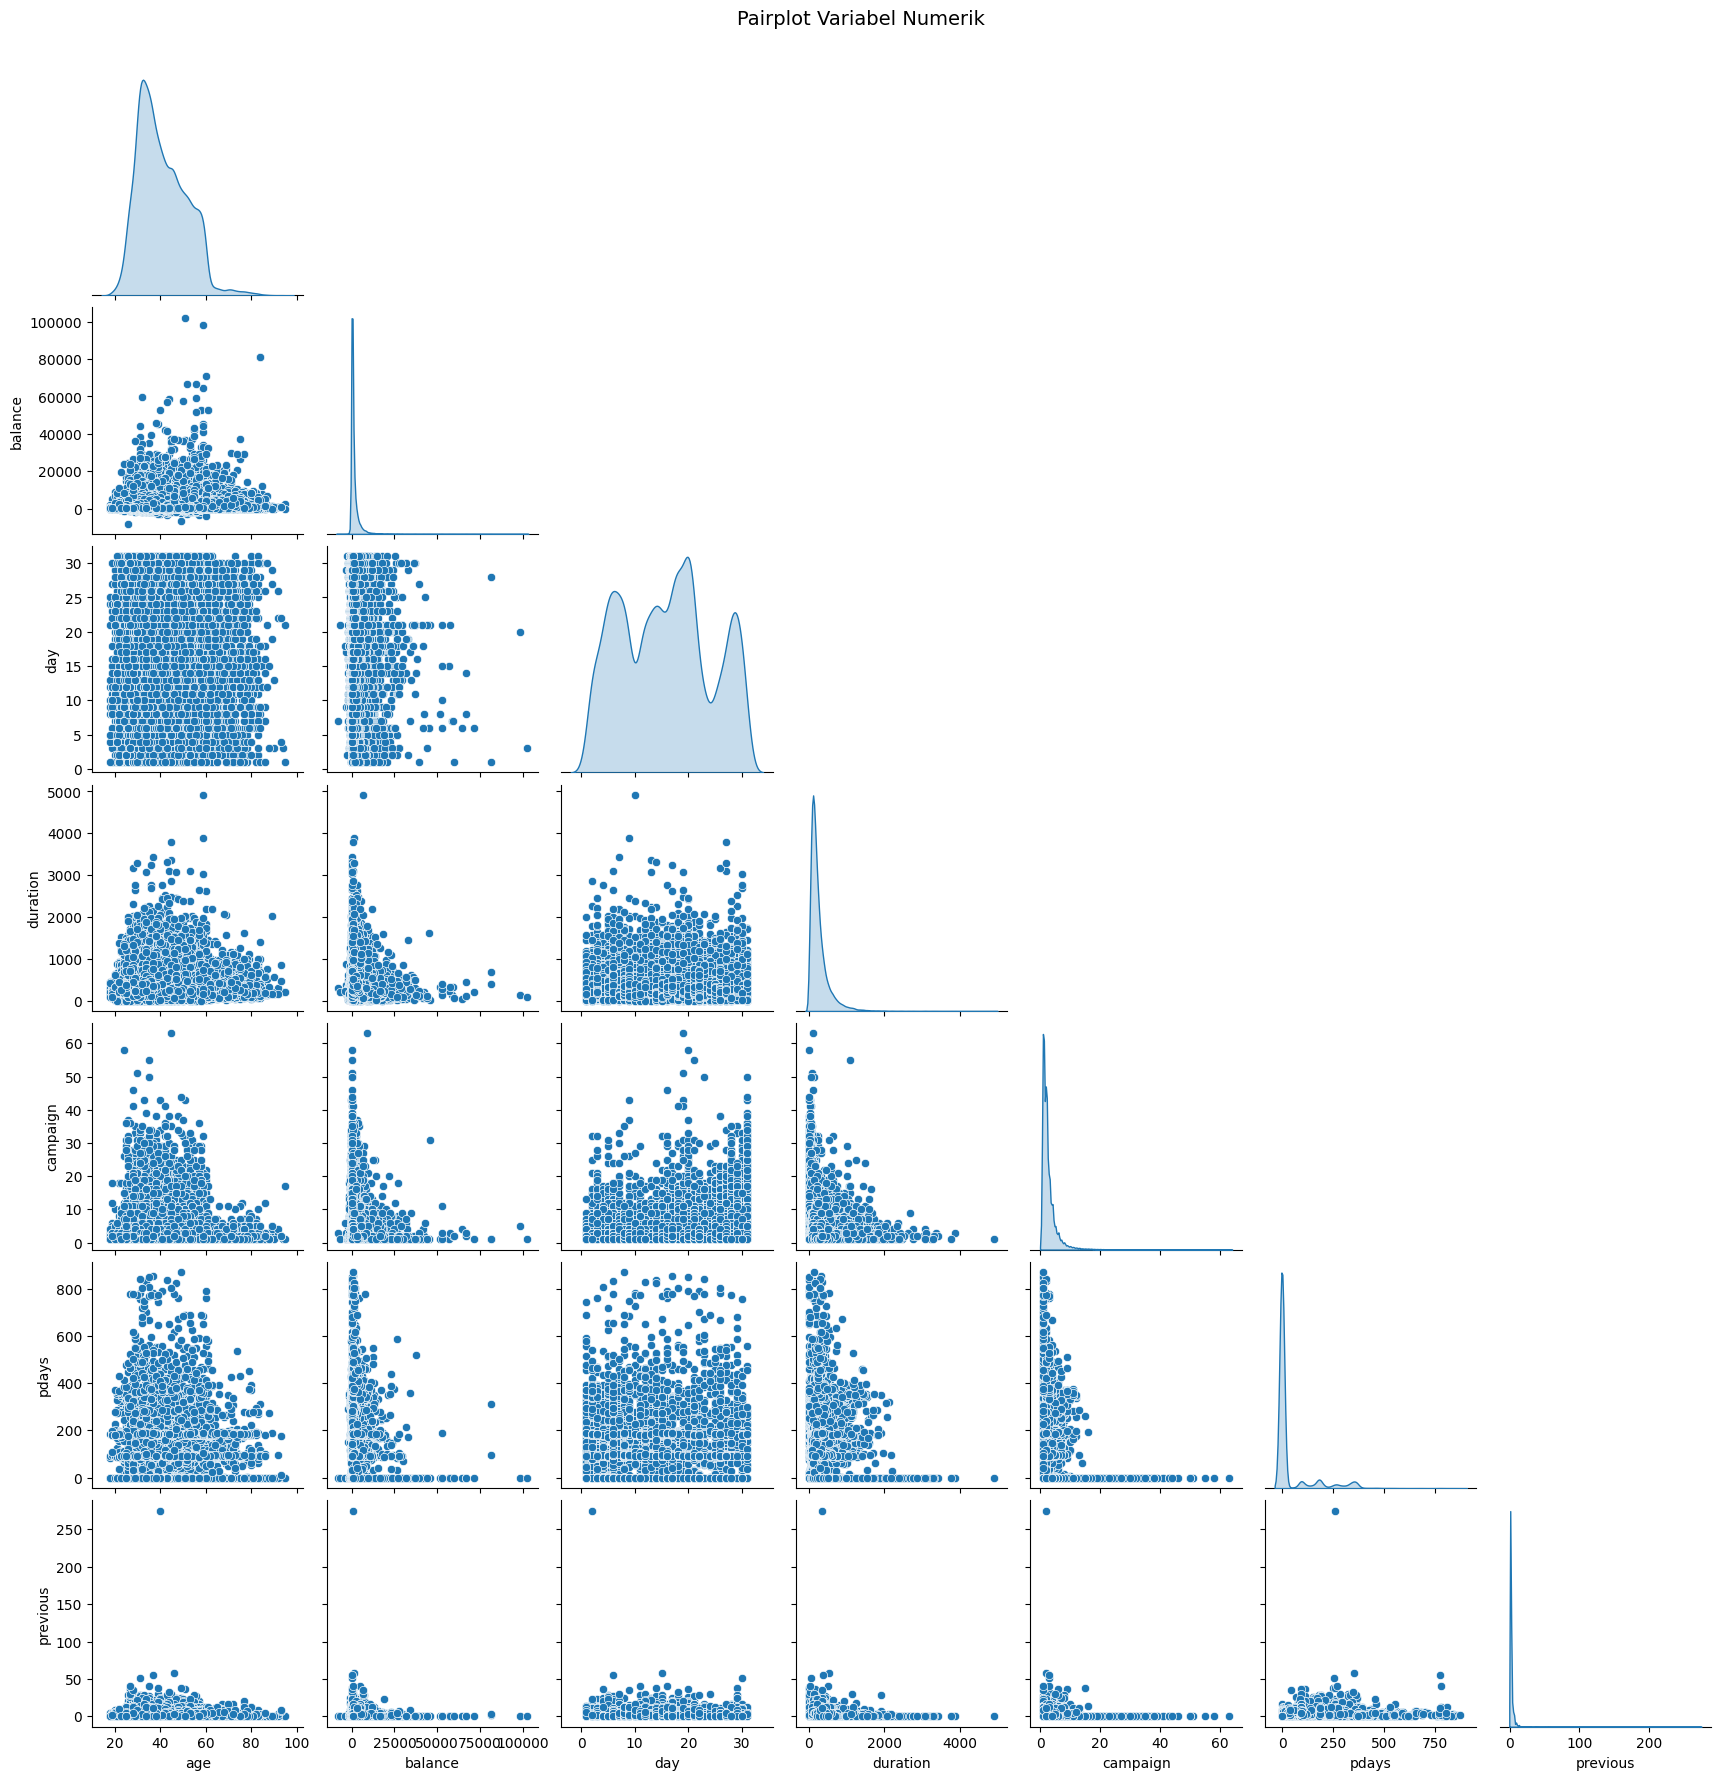

In [ ]:
pairplot_analysis(df, nums)

### **Findings dari Pairplot**:
1. **Distribusi Variabel Numerik**:
   - Sebagian besar variabel memiliki distribusi yang tidak merata (skewed), terutama `balance`, `duration`, dan `pdays`.

2. **Hubungan Antar Variabel**:
   - Tidak ada pola hubungan yang jelas di antara sebagian besar variabel numerik, kecuali hubungan lemah antara `pdays` dan `previous`.

3. **Korelasi Lemah**:
   - Scatter plot menunjukkan korelasi yang sangat rendah antara variabel seperti `campaign` terhadap variabel lainnya, mengonfirmasi hasil heatmap.

## 3. Analisis Hubungan Variabel Kategorikal dengan Target

In [ ]:
def categorical_target_relationship(df, categorical_columns, target_col):
    for col in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col, hue=target_col, palette='Set2')
        plt.title(f'Relasi {col} dengan {target_col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.tight_layout()
        plt.show()


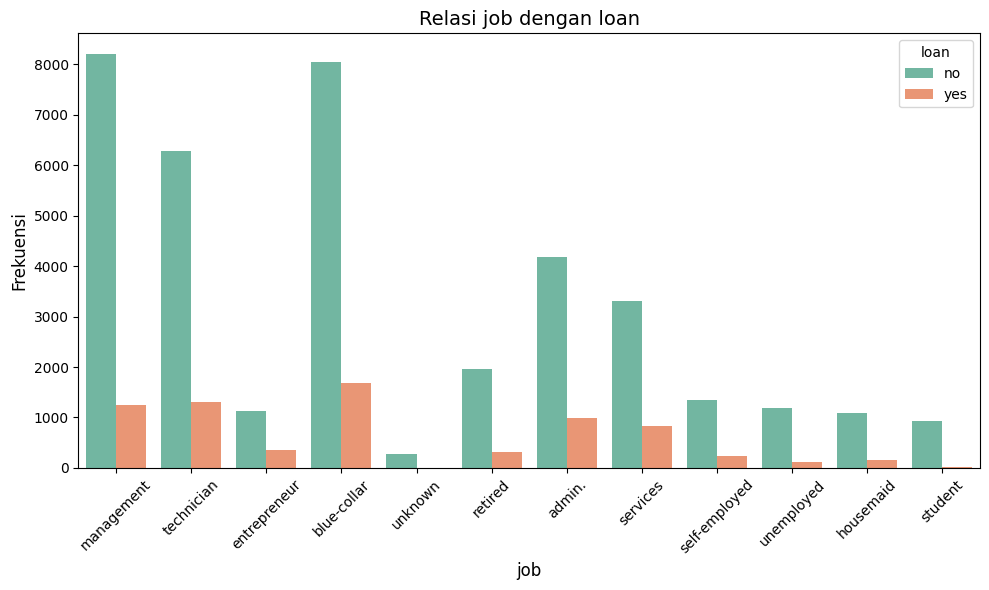

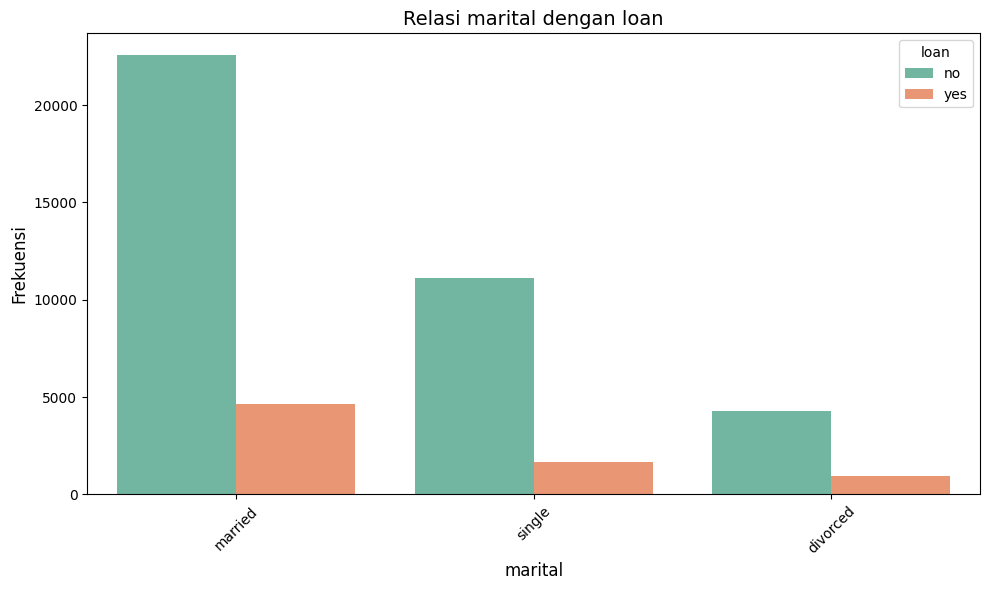

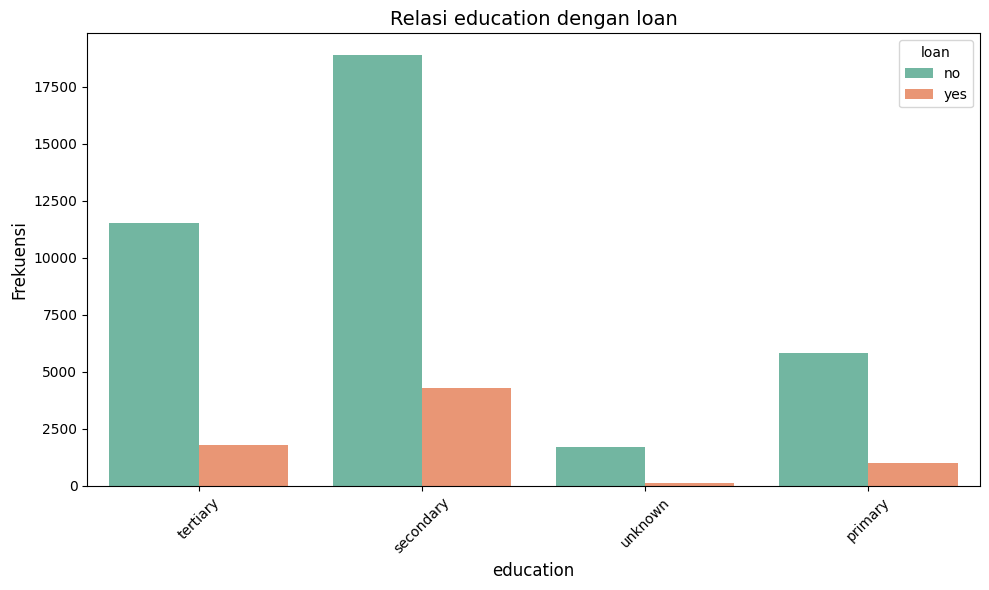

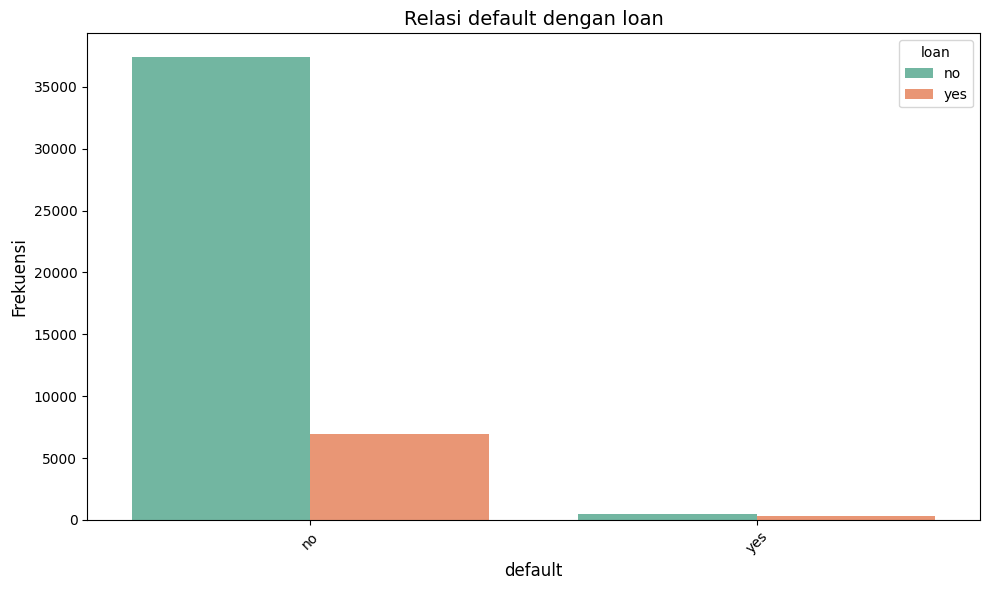

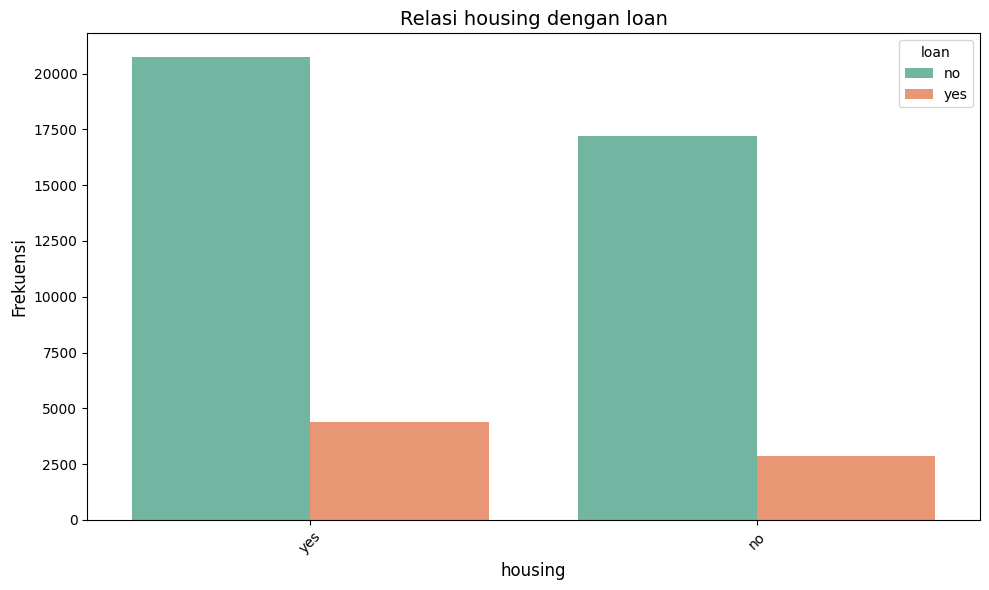

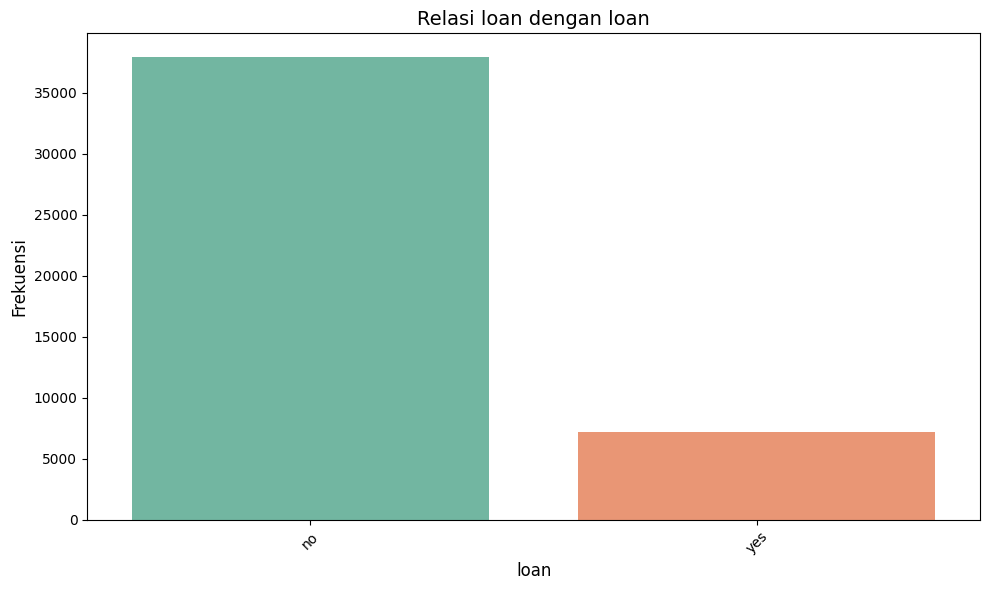

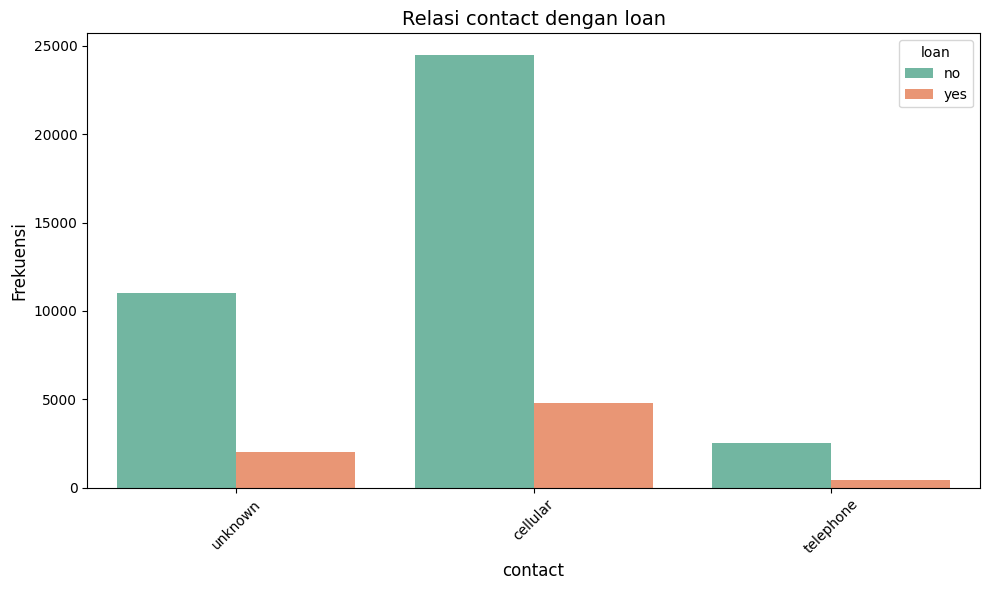

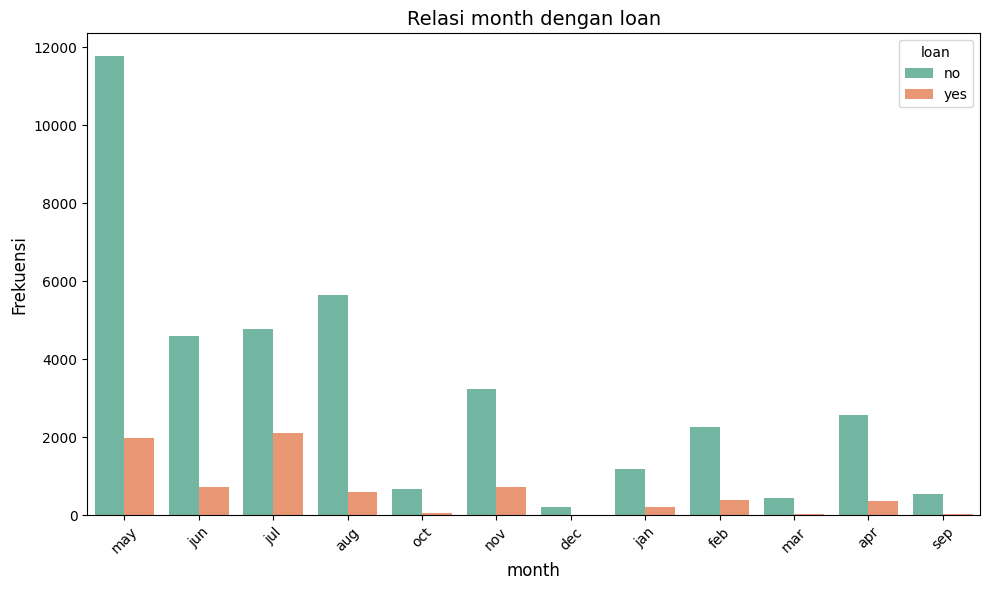

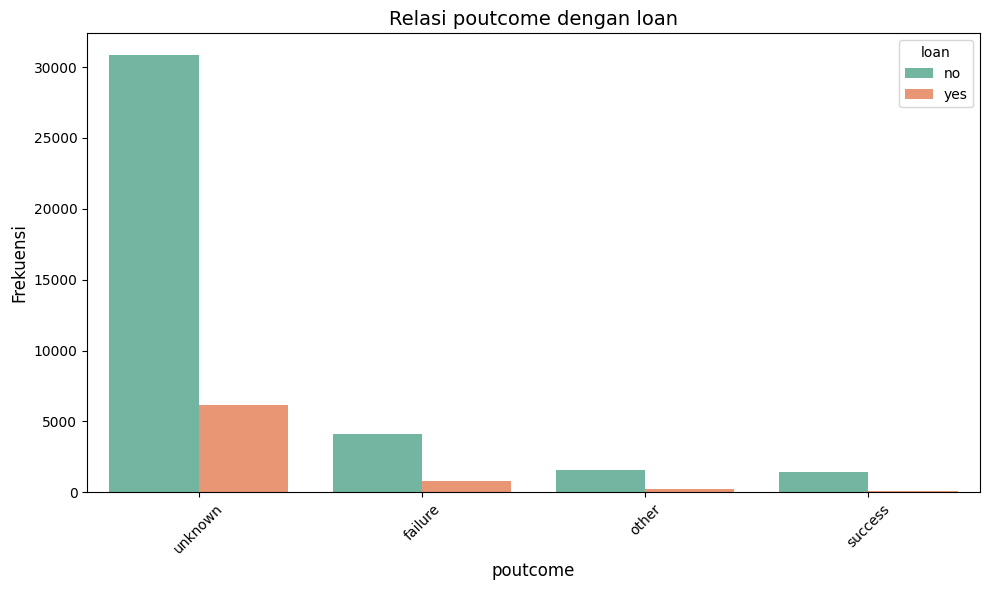

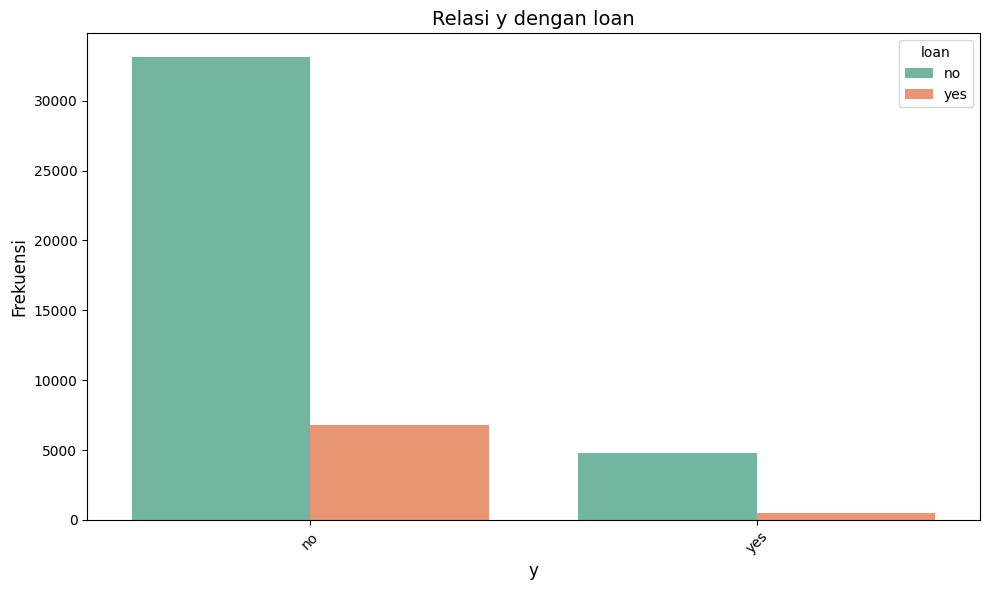

In [ ]:
if 'loan' in df.columns:  # Ubah target sesuai dataset
    categorical_target_relationship(df, cats, 'loan')

## Pengaruh Jumlah Kampanye terhadap Pembukaan Akun Deposit

### Definisi Hipotesis
**Hipotesis Nol (H0)** <br>
Definisi: Jumlah kampanye yang dilakukan oleh bank tidak mempengaruhi keputusan nasabah untuk membuka akun deposit. Dalam istilah statistik, ini berarti bahwa tidak ada perbedaan signifikan dalam tingkat keberhasilan pembukaan akun deposit antara kelompok nasabah yang menerima jumlah kampanye yang berbeda.

**Hipotesis Alternatif (H1)** <br>
Definisi: Jumlah kampanye yang dilakukan oleh bank mempengaruhi keputusan nasabah untuk membuka akun deposit. Dalam istilah statistik, ini berarti bahwa terdapat perbedaan signifikan dalam tingkat keberhasilan pembukaan akun deposit antara kelompok nasabah yang menerima jumlah kampanye yang berbeda.

### Participant
Peserta eksperimen adalah nasabah bank yang terdaftar dalam dataset dan menjadi target dari kampanye pemasaran.

### Variabel yang Diuji
Variabel Independen: jumlah kampanye (campaign) yang diterima oleh nasabah. <br>
Variabel Dependen: Keputusan nasabah untuk membuka akun deposit (kolom y, yang berisi "yes" atau "no").

### Metrics yang Digunakan
**Conversion Rate** mengukur persentase peserta yang membuka akun deposit setelah berpartisipasi dalam kampanye. Ini dihitung dengan menghitung proporsi peserta yang membuka akun deposit (nilai yes dalam kolom y) dari total peserta. <br>
**Statistical Significance** mengacu pada p-value yang diperoleh dari pengujian hipotesis yang digunakan untuk menentukan apakah ada hubungan yang signifikan antara jumlah kampanye dan keputusan membuka akun deposit.

### Pengujian yang Digunakan
Dalam kode ini, dua jenis pengujian statistik digunakan untuk membandingkan grup berdasarkan jumlah kampanye dan keberhasilan membuka akun deposit: <br>

# Analisis Chi-Square

Jumlah total data: 45211

Tabel Kontingensi:
y            no   yes
campaign             
False     13835  1327
True      26087  3962

Hasil Uji Chi-Square:
Chi-Square Statistic: 191.28
P-value: 0.0000
Degrees of Freedom: 1
Expected Frequencies:
[[13388.27639291  1773.72360709]
 [26533.72360709  3515.27639291]]

Kesimpulan:
Hipotesis Alternatif (H1): Jumlah kampanye memengaruhi keputusan nasabah untuk membuka akun deposit.


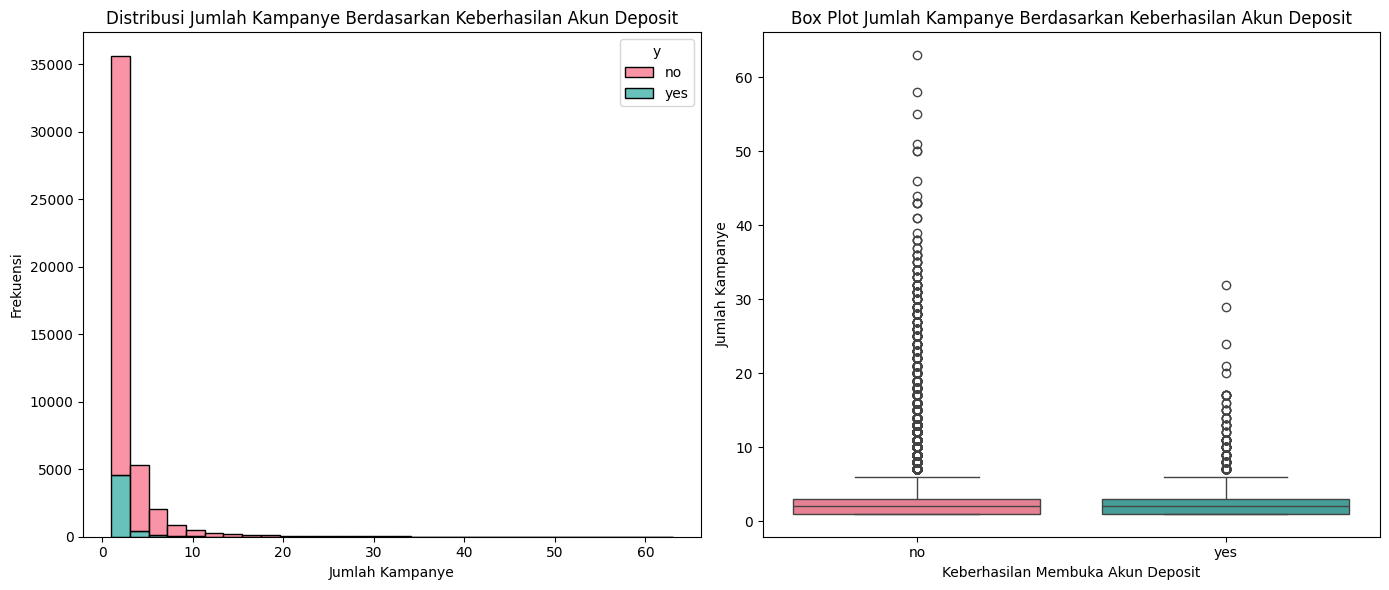

In [ ]:
from scipy import stats

# Menampilkan jumlah total data
total_data_count = len(df)
print(f"Jumlah total data: {total_data_count}")

# Menghitung median jumlah kampanye
median_campaign = df['campaign'].median()

# Membuat dua grup berdasarkan median jumlah kampanye
group1 = df[df['campaign'] <= median_campaign]
group2 = df[df['campaign'] > median_campaign]

# Membuat tabel kontingensi untuk uji Chi-Square
contingency_table = pd.crosstab(df['campaign'] <= median_campaign, df['y'])

# Melakukan Uji Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Menampilkan hasil
print("\nTabel Kontingensi:")
print(contingency_table)

print("\nHasil Uji Chi-Square:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretasi hasil
alpha = 0.05  # level signifikansi
if p < alpha:
    kesimpulan = "Hipotesis Alternatif (H1): Jumlah kampanye memengaruhi keputusan nasabah untuk membuka akun deposit."
else:
    kesimpulan = "Hipotesis Nol (H0): Jumlah kampanye tidak memengaruhi keputusan nasabah untuk membuka akun deposit."

# Cetak kesimpulan
print(f"\nKesimpulan:\n{kesimpulan}")

# Visualisasi Histogram dan Boxplot
plt.figure(figsize=(14, 6))

# Histogram Jumlah Kampanye
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='campaign', hue='y', multiple='stack', palette='husl', bins=30)
plt.title('Distribusi Jumlah Kampanye Berdasarkan Keberhasilan Akun Deposit')
plt.xlabel('Jumlah Kampanye')
plt.ylabel('Frekuensi')

# Box Plot Jumlah Kampanye
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='y', y='campaign', palette='husl')
plt.title('Box Plot Jumlah Kampanye Berdasarkan Keberhasilan Akun Deposit')
plt.xlabel('Keberhasilan Membuka Akun Deposit')
plt.ylabel('Jumlah Kampanye')

plt.tight_layout()
plt.show()



### **Interpretasi Hasil**
1. **Tabel Kontingensi**:
   - **Jumlah kampanye ≤ median (`False`)**:
     - Tidak membuka akun deposit (`no`): 13,835
     - Membuka akun deposit (`yes`): 1,327
     - **Success Rate**: 1,327 / (13,835 + 1,327) ≈ **8.76%**
   - **Jumlah kampanye > median (`True`)**:
     - Tidak membuka akun deposit (`no`): 26,087
     - Membuka akun deposit (`yes`): 3,962
     - **Success Rate**: 3,962 / (26,087 + 3,962) ≈ **13.18%**

2. **Hasil Success Rate**:
   - Success rate untuk nasabah dengan jumlah kampanye tinggi (`campaign > median`) **lebih rendah** dibandingkan nasabah dengan jumlah kampanye rendah.

3. **Hasil Uji Chi-Square**:
   - **Chi-Square Statistic**: 191.28
   - **P-value**: 0.0000 (sangat signifikan)
   - Menunjukkan bahwa jumlah kampanye memiliki hubungan yang signifikan dengan pembukaan akun deposit.

4. **Visualisasi**:
   - **Histogram**:
     - Sebagian besar kampanye dengan jumlah tinggi menghasilkan hasil "no" (tidak membuka akun deposit).
   - **Boxplot**:
     - Distribusi jumlah kampanye yang lebih tinggi terlihat lebih terkait dengan hasil "no" dibandingkan "yes".

---

### **Statistik**:
- Dengan **p-value = 0.0000** (< 0.05), kita **menolak Hipotesis Nol (H₀)**.
- **Hipotesis Alternatif (H₁)** diterima: Jumlah kampanye secara signifikan memengaruhi keputusan nasabah untuk membuka akun deposit.
- Namun, **arah pengaruhnya negatif**: **Jumlah kampanye yang lebih tinggi justru menurunkan kemungkinan pembukaan akun deposit.**

---

### **Kesimpulan**:
- **Efek Negatif Jumlah Kampanye**:
  - Kampanye yang terlalu sering atau terlalu banyak dapat mengurangi efektivitas karena kemungkinan nasabah merasa terganggu (over-contact).
- **Data Mendukung Hipotesis Alternatif (H₁)**:
  - Jumlah kampanye memengaruhi pembukaan akun deposit, tetapi dalam arah yang **negatif**.

---

### **Rekomendasi Strategis**:
1. **Kurangi Frekuensi Kampanye**:
   - Hindari terlalu banyak menghubungi nasabah, terutama mereka yang telah dihubungi lebih dari median jumlah kampanye.
2. **Optimalkan Targeting**:
   - Fokus pada kualitas interaksi dalam kampanye, bukan kuantitas.
3. **Segmentasi Lebih Lanjut**:
   - Identifikasi segmen nasabah yang lebih responsif terhadap kampanye awal untuk mengurangi biaya dan meningkatkan efektivitas.


# Analisis Regresi Linear

Hasil Regresi Linear Menggunakan Scikit-Learn:
Mean Squared Error (MSE): 0.1055
R-squared (R2): 0.0055

Hasil Regresi Linear Menggunakan Statsmodels:
                            OLS Regression Results                            
Dep. Variable:               y_binary   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           1.01e-54
Time:                        10:12:50   Log-Likelihood:                -12713.
No. Observations:               45211   AIC:                         2.543e+04
Df Residuals:                   45209   BIC:                         2.545e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

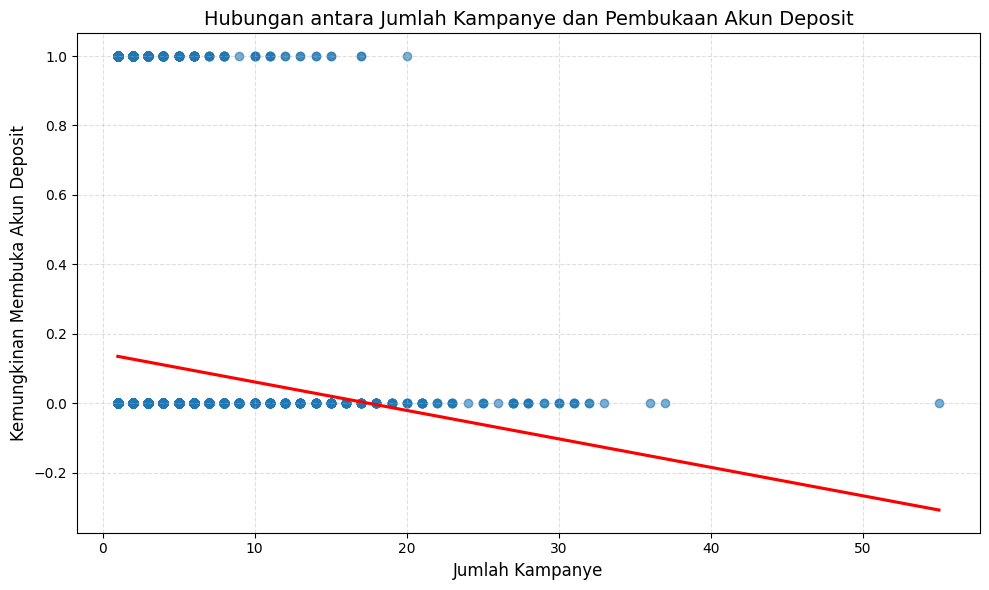

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Pra-pemrosesan data
# Ubah variabel target menjadi biner (y: 'yes' -> 1, 'no' -> 0)
df['y_binary'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Variabel independen (X) dan dependen (y)
X = df[['campaign']]  # Menggunakan jumlah kampanye sebagai prediktor
y = df['y_binary']  # Variabel target

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = lin_reg.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Statistik regresi menggunakan statsmodels untuk interpretasi
X_with_const = sm.add_constant(X)  # Menambahkan konstanta untuk intercept
model = sm.OLS(y, X_with_const).fit()

# Cetak hasil
print("Hasil Regresi Linear Menggunakan Scikit-Learn:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}\n")

print("Hasil Regresi Linear Menggunakan Statsmodels:")
print(model.summary())

# Kesimpulan Berdasarkan Koefisien dan P-value
alpha = 0.05  # Tingkat signifikansi
p_value_campaign = model.pvalues['campaign']
coef_campaign = model.params['campaign']

print("\nKesimpulan Analisis:")
if p_value_campaign < alpha:
    if coef_campaign > 0:
        print("Hipotesis Alternatif (H₁): Jumlah kampanye memiliki hubungan positif terhadap pembukaan akun deposit.")
    else:
        print("Hipotesis Alternatif (H₁): Jumlah kampanye memiliki hubungan negatif terhadap pembukaan akun deposit.")
else:
    print("Hipotesis Nol (H₀): Tidak ada hubungan signifikan antara jumlah kampanye dan pembukaan akun deposit.")

# Visualisasi Hasil Regresi
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['campaign'], y=y_test, scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, ci=None)
plt.title('Hubungan antara Jumlah Kampanye dan Pembukaan Akun Deposit', fontsize=14)
plt.xlabel('Jumlah Kampanye', fontsize=12)
plt.ylabel('Kemungkinan Membuka Akun Deposit', fontsize=12)
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()


### **Analisis Pendukung dari Regresi Linear**

Berdasarkan hasil regresi linear yang ditampilkan:

1. **Koefisien Kampanye (`campaign`)**:
   - **Nilai koefisien**: -0.0076
   - Interpretasi: Untuk setiap peningkatan satu unit jumlah kampanye, peluang membuka akun deposit **menurun sebesar 0.76%**.
   - Hubungan negatif ini menunjukkan bahwa semakin banyak kampanye dilakukan, kemungkinan pembukaan akun deposit justru menurun.

2. **Signifikansi Statistik**:
   - **P-value untuk `campaign`**: 0.000 (< 0.05).
   - Artinya, jumlah kampanye memiliki hubungan yang **secara statistik signifikan** dengan pembukaan akun deposit.
   - Hal ini mendukung hasil analisis Chi-Square yang menunjukkan hubungan signifikan antara jumlah kampanye dan keputusan pembukaan akun deposit.

3. **Nilai R-squared (R²)**:
   - **R² = 0.005**:
     - Hanya 0.55% dari variasi dalam keputusan pembukaan akun deposit yang dapat dijelaskan oleh jumlah kampanye.
     - Ini menunjukkan bahwa meskipun hubungan signifikan, jumlah kampanye **bukan satu-satunya faktor utama** yang memengaruhi pembukaan akun deposit.

4. **Garis Regresi**:
   - Garis regresi menunjukkan hubungan **negatif** antara jumlah kampanye dan probabilitas pembukaan akun deposit, konsisten dengan koefisien negatif yang ditemukan.

---

### **Kesimpulan Gabungan (Chi-Square & Regresi Linear)**:
1. **Hubungan Signifikan**:
   - Hasil Chi-Square dan regresi linear menunjukkan bahwa jumlah kampanye memiliki hubungan signifikan dengan keputusan membuka akun deposit.

2. **Arah Hubungan (Negatif)**:
   - Berdasarkan regresi linear, hubungan jumlah kampanye terhadap pembukaan akun deposit adalah **negatif**.
   - Semakin banyak kampanye dilakukan, semakin kecil kemungkinan nasabah membuka akun deposit.

3. **Efek Negatif Kampanye Berlebihan**:
   - Hal ini mengindikasikan bahwa terlalu banyak kampanye dapat menjadi kontraproduktif dan menyebabkan penurunan efektivitas.

---

### **Rekomendasi Strategis**:
1. **Optimalisasi Kampanye**:
   - Hindari menghubungi nasabah terlalu sering atau melebihi median jumlah kampanye.
   - Fokus pada kualitas kontak daripada kuantitas.

2. **Segmentasi Nasabah**:
   - Identifikasi nasabah yang lebih responsif terhadap kampanye awal untuk meminimalkan gangguan akibat kontak berlebihan.

3. **Analisis Faktor Lain**:
   - Tambahkan variabel lain seperti `balance`, `duration`, atau `age` dalam model regresi untuk mengeksplorasi faktor-faktor yang lebih signifikan.
